# Homework 1

## Preparation

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from timeit import default_timer as timer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from scipy.sparse.linalg import eigs
import math
import sys

np.random.seed(12)

## Plotting functions

In [2]:
# Defining plots


### plot loss ###

def plot_loss(loss_list, iterations):


    plt.grid()
    plt.plot(iterations, loss_list, linewidth=5, color='red', label='Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.title('Loss function')

    plt.show()



### plot accuracy ###

def plot_accuracy(accuracy_list, iterations):


    plt.grid()
    plt.plot(iterations, accuracy_list, label='Accuracy', c='green', linewidth=5)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')

    plt.show()



### plot change ###

def plot_change(change_list, iterations, threshold):

    #plot absolute values of changes
    plt.figure().set_figwidth(15)
    plt.grid()
    plt.plot(iterations, change_list,'.', markersize='5', c='orange',  label = 'Changes')

    #plot interpolation line
    coefficients = np.polyfit(iterations, change_list, 6)
    polynomial = np.poly1d(coefficients)
    y_fit = polynomial(iterations)

    plt.plot(iterations, y_fit, color= 'red', label = 'Interpolation line')

    #plot threshold
    plt.axhline(y=threshold, color='blue', label = 'threshold')

    plt.yscale('log')
    plt.ylim(0.00001, 1)

    plt.xlabel('Iterations')
    plt.legend(loc='best')
    plt.title('Absolute updating values for a random y entry')
    plt.show()


### plot grad norm ###

def plot_gradnorm(change_list, iterations):
    plt.grid()
    plt.plot(iterations, change_list, label='Gradient norm', c='orange')
    plt.xlabel('Iterations')
    plt.title('Gradient norm')

    plt.show()


### Unique function for plotting both accuracy and loss ###

def plot_loss_accuracy(loss_list, accuracy_iter_list, iterations_loss, iterations_accuracy):

    accuracy_list = [x[0] for x in accuracy_iter_list]

    # Create a subplot with two plots in one row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot loss
    ax1.plot(iterations_loss, loss_list, linewidth=3, color='tomato', label='Loss')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')
    ax1.set_xticks(range(int(max(iterations_loss))+1))
    ax1.legend(loc='best')
    ax1.set_title('Loss function')

    # Plot accuracy
    ax2.plot(iterations_accuracy, accuracy_list, label='Accuracy', c='green', linewidth=3)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Accuracy')
    ax2.set_xticks(range(int(max(iterations_accuracy))+1))
    ax2.legend(loc='lower right')
    ax2.set_title('Accuracy')


    ax1.set_xticks([])
    ax1.set_xticklabels([])

    ax2.set_xticks([])
    ax2.set_xticklabels([])


    # Display the subplot
    plt.show()



### Plotting settings

In [3]:
c_map = "plasma"
cpu_time_list = []

In [4]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

cmap = cm.get_cmap(c_map)

#Normalize the colors
vmin, vmax = 0,1
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
coolwarm_min = cmap(norm(vmin))
coolwarm_max = cmap(norm(vmax))

# Convert the RGBA values to HEX
coolwarm_min_hex = mcolors.rgb2hex(coolwarm_min)
coolwarm_max_hex = mcolors.rgb2hex(coolwarm_max)

# Display the HEX values
#print('color_min:', coolwarm_min_hex)
#print('color_max:', coolwarm_max_hex)

<ipython-input-4-6e59c1d3c8bd>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(c_map)


In [5]:
class_colors = [coolwarm_max_hex, coolwarm_min_hex]

## Generating and plotting data

Run the next block (and comment the "BLOBS" one) for a study on moon shape clusters

In [6]:
# #### MOONS ######

# #Number of datapoints
# n_points = 10000
# log10_n_points = (math.floor(math.log(n_points, 10)))

# X,y = make_moons(n_samples = n_points, noise = 0.12, random_state= 12)

# # Random defining indexes of samples (3% of total points)
# n_samples = int(0.03 * len(y))
# sample = np.random.choice(np.arange(len(y)), size=n_samples, replace=False)

Generating X

In [7]:
##### BLOBS ######

# Number of datapoints
n_points = 10000
log10_n_points = (math.floor(math.log(n_points, 10)))

# Choose centers of the clusters
centers = [(np.random.uniform(-25, 25), np.random.uniform(-25, 25)),
           (np.random.uniform(-25, 25), np.random.uniform(-25, 25))]


X,y = make_blobs(n_samples = n_points, n_features= 2, centers = 2, random_state= 12)


# Random defining indexes of samples (3% of total points)
n_samples = int(0.03 * len(y))
sample = np.random.choice(np.arange(len(y)), size=n_samples, replace=False)

In [8]:
# Scaling points
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
# Splitting into labeled and unlabeled data
labeled_x = X[sample]
unlabeled_x = np.delete(X, sample, axis=0)

Generating y

In [10]:
# True labels of unlabeled points y
y_true = np.array([y[l] for l in range(len(y)) if l not in sample])

# Random initializing unlabeled values y_unlabeled
y_unlabeled_start =  np.random.rand(len(unlabeled_x))
y_unlabeled = y_unlabeled_start.copy()

# Labeled samples points y_sample
y_sample = y[sample].reshape(len(y[sample]), 1)

In [11]:
print(f"\n Initialized labels for unlabeled points: {y_unlabeled} \n True labels we want to predict: {y_true}")


 Initialized labels for unlabeled points: [0.83971297 0.17300441 0.68840877 ... 0.47113244 0.18455355 0.66082431] 
 True labels we want to predict: [0 0 0 ... 1 0 0]


Plotting the data

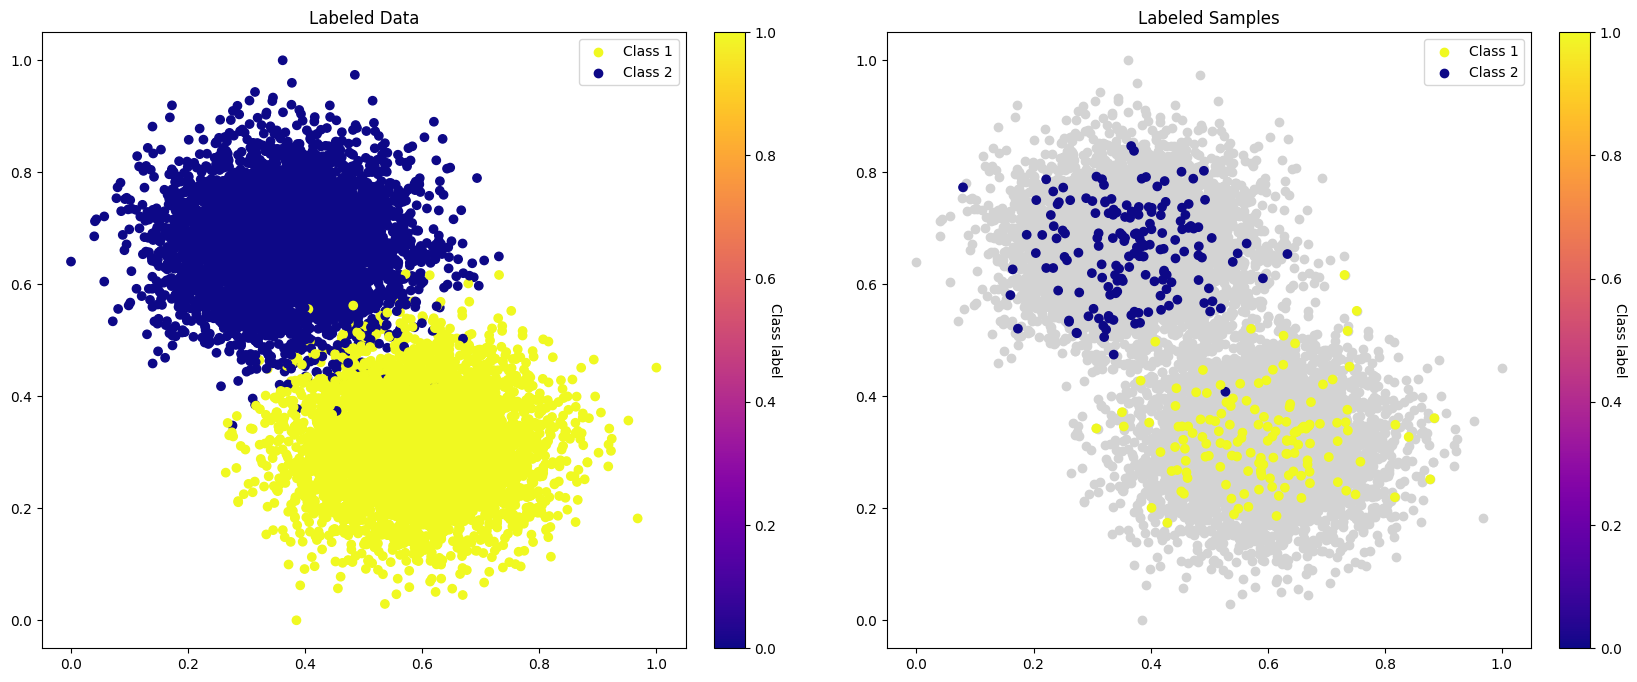

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

class_1_handle = ax1.scatter([], [], c=class_colors[0], label='Class 1')
class_2_handle = ax1.scatter([], [], c=class_colors[1], label='Class 2')

### Labeled Data (ax1)
im1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=c_map)
ax1.legend(handles=[class_1_handle, class_2_handle], loc='best')
ax1.set_title('Labeled Data')

# Create a color map legend for the first subplot
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label('Class label', rotation=270)

### Labeled Samples over switched off Labeled Data (ax2)

im2a = ax2.scatter(X[:, 0], X[:, 1], c='lightgrey')
im2b = ax2.scatter(X[sample][:,0], X[sample][:,1], c=y[sample], cmap=c_map)
ax2.legend(handles=[class_1_handle, class_2_handle], loc='best')
ax2.set_title('Labeled Samples')

# Create a color map legend for the second subplot
cbar2 = fig.colorbar(im2b, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label('Class label', rotation=270)


fig.show()


## Weights Matrices

Euclidean distances Matrices

In [13]:
# Defining matrices with Euclidean distances

d = X.shape[1] # dimentions of the data

# Setting columns for matrix generation
labeled_x_cols = [labeled_x[:,i].reshape(len(labeled_x[:,i]), 1) for i in range(d)]
unlabeled_x_cols = [unlabeled_x.T[i, :].reshape(len(unlabeled_x.T[i, :]),1) for i in range(d)]


# Euclidean distances (unlabeled-labeled)
ED = (sum((labeled_x_cols[i] - unlabeled_x_cols[i].T)**2 for i in range(d))) ** (1/2)

# Euclidean distances (labeled-labeled)
ED_hat = (sum((unlabeled_x_cols[i] - unlabeled_x_cols[i].T)**2 for i in range(d))) ** (1/2)


Gaussian similarity

In [14]:
# Weights matrices computed with Gaussian similarity function

temperature = 0.01

W = np.exp(-((ED)**2) // temperature)
W_hat = np.exp(-((ED_hat)**2) // temperature)

print(f"labeled-unlabeled W matrix has shape ({W.shape})") #is: \n\n {W} \n\n")
print(f"unlabeled-unlabeled W_hat matrix has shape ({W_hat.shape})") #is: \n\n {W_hat}")

labeled-unlabeled W matrix has shape ((300, 9700))
unlabeled-unlabeled W_hat matrix has shape ((9700, 9700))


In [15]:
# Scaling weights matrices

# scaler = MinMaxScaler()

# scaler.fit(W)
# W = scaler.transform(W)

# scaler.fit(W_hat)
# W_hat = scaler.transform(W_hat)

## Loss Function

In [16]:
def loss_function(y_unlabeled):

    first_term = W*((y_unlabeled - y_sample)**2)

    second_term = W_hat*(y_unlabeled - y_unlabeled[:, np.newaxis])**2


    loss_function = np.sum(first_term) + (1/2) * np.sum(second_term)

    return loss_function

## Gradient Function

In [17]:
# Define auxilary function to check if the block is iterable

def is_iterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False


# Gradient function

def compute_gradients(block, y_unlabeled):

    j = block

    # Partial (or full) derivative on a cordinates block

    if is_iterable(j):

        first_term_gradients = W[:,j] * (y_unlabeled[j] - y_sample)

        second_term_gradients = W_hat[:,j] * (y_unlabeled[j] - y_unlabeled[:, np.newaxis])

        return 2 * np.sum(first_term_gradients, axis = 0) + 2 * np.sum(second_term_gradients, axis = 0)


    # Partial derivative w.r.t. one single entry

    else:

        first_term_gradients = W[:,[j]] * (y_unlabeled[j] - y_sample)

        second_term_gradients = W_hat[:,[j]] * (y_unlabeled[j] - y_unlabeled[:, np.newaxis])

        return 2 * np.sum(first_term_gradients) + 2 * np.sum(second_term_gradients)

### Hessian Matrix and Lipschitz constant

In [18]:
# Hessian matrix of the Loss function

H = -2 * W_hat
D = [2 * ( np.sum(W[:,j]) + np.sum(W_hat[:,j])) for j in range(len(unlabeled_x))]
np.fill_diagonal(H,D)

In [19]:
# Find the greatest eigenvalue of Hessian Matrix
L = np.real(eigs(H, 1)[0])

print(f"Lipschitz constant L = {L[0]}")
print(f"1/L = {1/L[0]}")

Lipschitz constant L = 2007.119201619996
1/L = 0.0004982265125025335


# Gradient Descent

## Line search: Armijo Rule

### Defining functions

Computation

In [20]:
# # Define Armijo Rule

# def armijo_rule(y_unlabeled, starting_learning_rate, delta, gamma, gradient):

#     y_armijo = y_unlabeled.copy()

#     alfa = starting_learning_rate
#     loss_f = loss_function(y_armijo)
#     grad_norm_squared = np.dot(gradient.T, gradient)

#     while not ( loss_function(y_armijo - alfa * gradient)
#               <= loss_f - gamma*alfa * grad_norm_squared
#               ):

#             alfa *= delta

#     return alfa, loss_f


# # Define Gradient Descent with Armijo Rule

# def gradient_descent_armijo(y_unlabeled, y_true, starting_learning_rate, delta, gamma, threshold, max_iterations):

#     prev_loss = float('inf')

#     y_armijo = y_unlabeled.copy()

#     #needed lists to plot
#     loss_list = []
#     accuracy_list = [accuracy_score(y_true, y_armijo.round())]
#     y_armijo_list = [y_unlabeled_start.copy()]


#     for iteration in range(max_iterations):

#         gradient = compute_gradients(np.arange(len(y_armijo)),y_armijo)

#         alfa_armijo, current_loss = armijo_rule(y_armijo, starting_learning_rate, delta, gamma, gradient)

#         y_armijo = y_armijo - alfa_armijo * gradient


#         #plotting updates
#         y_armijo_list.append(y_armijo)
#         accuracy = accuracy_score(y_true, y_armijo.round())
#         accuracy_list.append(accuracy)


#         print('iter:', iteration, '|   current_loss:', current_loss)


#         if abs(prev_loss - current_loss) < threshold:

#             loss_list.append(current_loss)
#             print('Last iteration:', iteration, '|   final loss:', current_loss)

#             break

#         prev_loss = current_loss

#         loss_list.append(current_loss) #plotting update



#     return y_armijo, loss_list, accuracy__iter_list_arm, y_armijo_list

In [21]:
# Define Armijo Rule

def armijo_rule(y_unlabeled, starting_learning_rate, delta, gamma, gradient):

    y_armijo = y_unlabeled.copy()

    alfa = starting_learning_rate
    loss_f = loss_function(y_armijo)
    grad_norm_squared = np.dot(gradient.T, gradient)

    while not ( loss_function(y_armijo - alfa * gradient)
              <= loss_f - gamma*alfa * grad_norm_squared
              ):

            alfa *= delta

    return alfa, loss_f


# Define Gradient Descent with Armijo Rule

def gradient_descent_armijo(y_unlabeled, y_true, starting_learning_rate, delta, gamma, threshold, max_iterations):

    #prev_loss = float('inf')

    y_armijo = y_unlabeled.copy()

    #needed lists to plot
    loss_list = []
    accuracy_iter_list_armijo = [(accuracy_score(y_true, y_armijo.round()), 0)]
    y_armijo_list = [y_unlabeled_start.copy()]


    for iteration in range(max_iterations):

        gradient = compute_gradients(np.arange(len(y_armijo)),y_armijo)

        alfa_armijo, current_loss = armijo_rule(y_armijo, starting_learning_rate, delta, gamma, gradient)

        y_armijo = y_armijo - alfa_armijo * gradient


        #plotting updates
        y_armijo_list.append(y_armijo)
        accuracy = accuracy_score(y_true, y_armijo.round())
        accuracy_iter_list_armijo.append((accuracy, iteration))


        print('iter:', iteration, '|   current_loss:', current_loss)


        if current_loss < threshold:

            loss_list.append(current_loss)

            break

        #prev_loss = current_loss

        loss_list.append(current_loss) #plotting update



    return y_armijo, loss_list, accuracy_iter_list_armijo, y_armijo_list

In [22]:
y_unlabeled = y_unlabeled_start.copy()
print(f"Initial value of Loss function: {loss_function(y_unlabeled)}")

Initial value of Loss function: 557492.1157217259


In [23]:
max_iterations = 100
treshold = 0.060*loss_function(y_unlabeled_start)
starting_learning_rate = 1

delta = 0.4 #from grid_search
gamma = 0.2 #from grid_search

start = timer()

y_unlabeled, loss_list, accuracy_iter_list_armijo, y_unlabeled_list = gradient_descent_armijo(y_unlabeled, y_true, starting_learning_rate, delta, gamma, treshold, max_iterations)

end = timer()
cpu_time_list.append(('Armijo', end-start))


print(f"___ \n")
print(f"Execution time in seconds: {(end - start)}")
print(f"Execution time in minutes: {(end - start)/60}")

iter: 0 |   current_loss: 557492.1157217259
iter: 1 |   current_loss: 82287.05024131609
iter: 2 |   current_loss: 51834.189939211865
iter: 3 |   current_loss: 42124.17869311964
iter: 4 |   current_loss: 37324.93124430483
iter: 5 |   current_loss: 33976.8721888981
iter: 6 |   current_loss: 31835.750575433343
___ 

Execution time in seconds: 29.434123908999993
Execution time in minutes: 0.49056873181666655


### Results and plots

In [24]:
# Assign labels 0 and 1
loss_list.append(loss_function(y_unlabeled))
y_unlabeled = y_unlabeled.round()

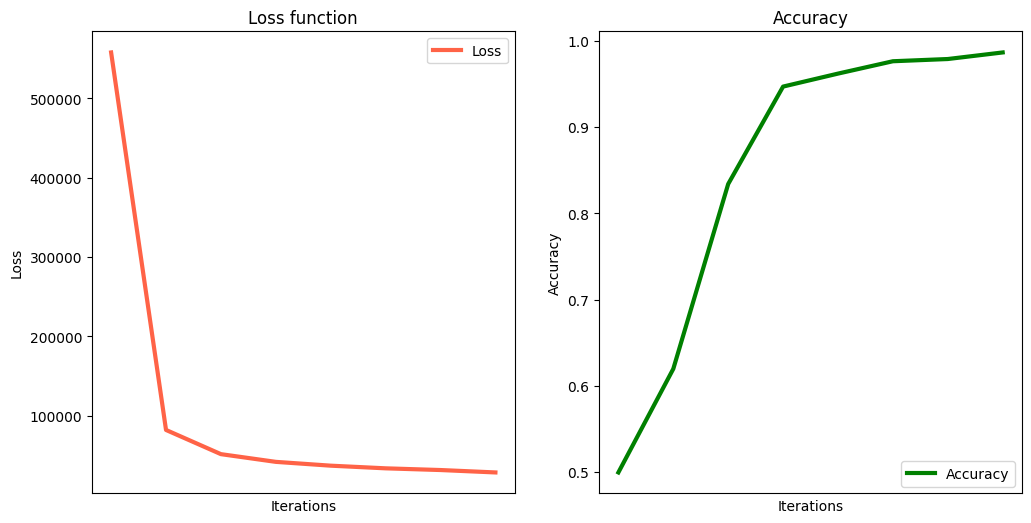

In [25]:
plot_loss_accuracy(loss_list, accuracy_iter_list_armijo, range(len(loss_list)), range(len(accuracy_iter_list_armijo)))

In [26]:
accuracy_iter_list_armijo.append((accuracy_score(y_true, y_unlabeled), accuracy_iter_list_armijo[-1][1]+1))
print(f"Number of misclassified variables: {(np.count_nonzero((y_true - y_unlabeled) != 0))}")
print(f"The accuracy is: {accuracy_score(y_true, y_unlabeled)}")
print(f"The f1 score is: {f1_score(y_true, y_unlabeled)}")

Number of misclassified variables: 131
The accuracy is: 0.9864948453608248
The f1 score is: 0.9865295629820052


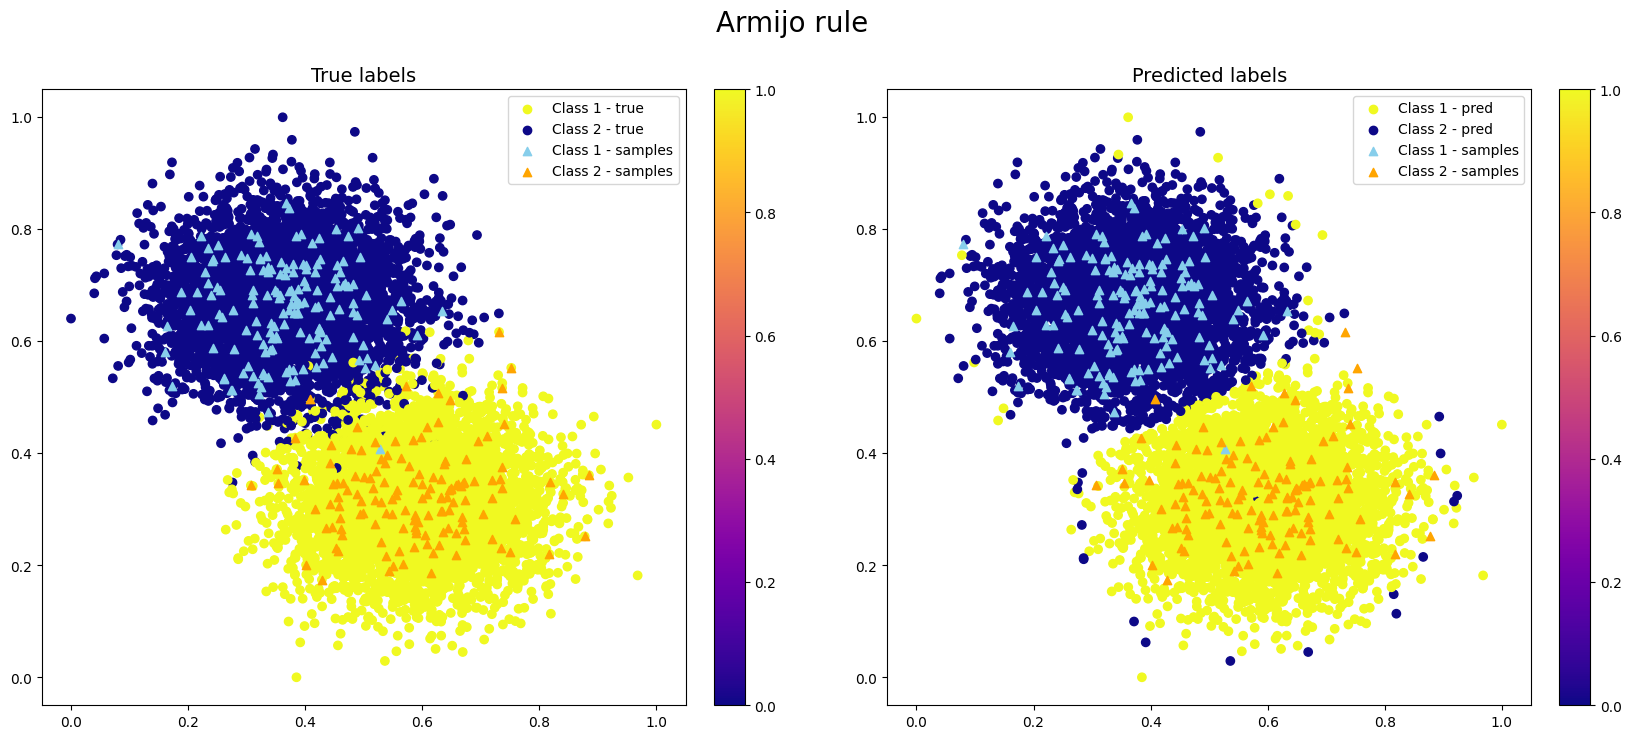

In [27]:
# Plot to visualize the result of classification
mask = np.ones(len(X), dtype=bool)
mask[sample] = False

X_pred = X[mask]
y_pred = y_unlabeled

fig2, (ax1_2,ax2_2) = plt.subplots(1, 2, figsize=(20, 8))

class_1_handle = ax1_2.scatter([], [], c=class_colors[0], label='Class 1 - true')
class_2_handle = ax1_2.scatter([], [], c=class_colors[1], label='Class 2 - true')
pred_class_1_handle = ax1_2.scatter([], [], c=class_colors[0], label='Class 1 - pred')
pred_class_2_handle = ax1_2.scatter([], [], c=class_colors[1], label='Class 2 - pred')
sample_class_1_handle = ax1_2.scatter([], [], c='skyblue', marker='^', label='Class 1 - samples')
sample_class_2_handle = ax1_2.scatter([], [], c='orange', marker='^', label='Class 2 - samples')

### True Labels
im1_2 = ax1_2.scatter(X[:, 0], X[:, 1], c=y, cmap=c_map)
ax1_2.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax1_2.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

# Create a color map legend for the first subplot
cbar1_2 = fig2.colorbar(im1_2, ax=ax1_2, fraction=0.046, pad=0.04)
cbar1_2.set_label('', rotation=270)

ax1_2.legend(handles=[class_1_handle, class_2_handle,sample_class_1_handle, sample_class_2_handle], loc='best')
ax1_2.set_title('True labels', fontsize=14)

### Predicted Labels
im2_2 = ax2_2.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, cmap=c_map)
ax2_2.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax2_2.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

# Create a color map legend for the second subplot
cbar2_2 = fig2.colorbar(im2_2, ax=ax2_2, fraction=0.046, pad=0.04)
cbar2_2.set_label('', rotation=270)

ax2_2.legend(handles=[pred_class_1_handle, pred_class_2_handle, sample_class_1_handle, sample_class_2_handle], loc='best')
ax2_2.set_title('Predicted labels', fontsize=14)

fig2.suptitle('Armijo rule', fontsize=20)

fig2.show()

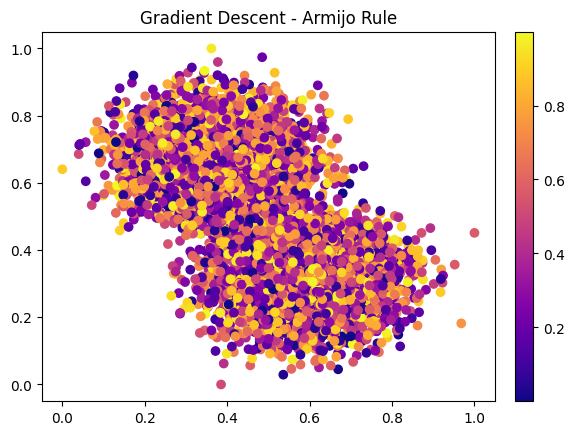

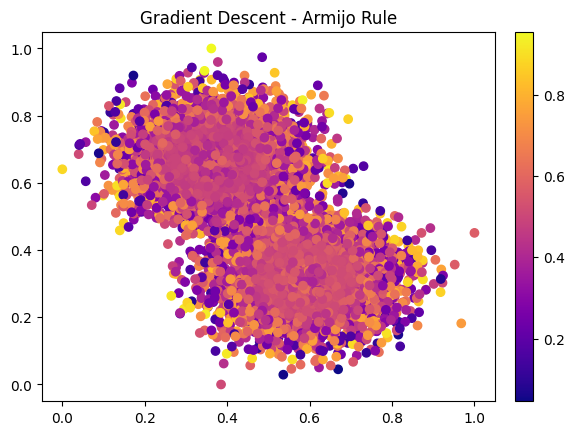

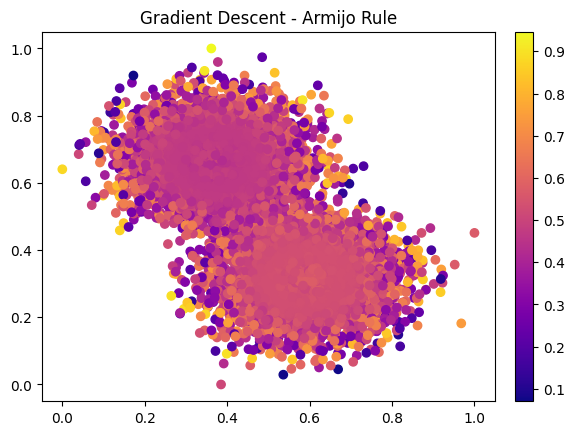

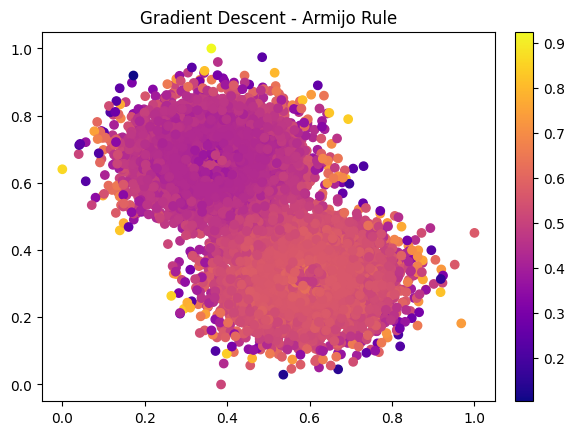

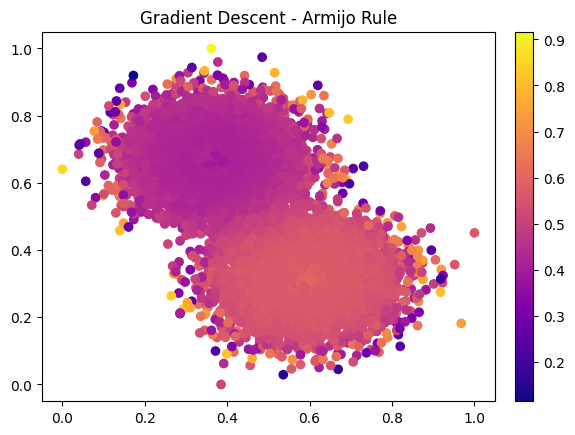

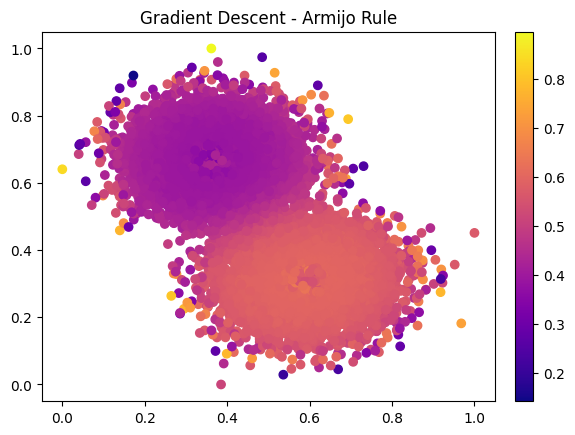

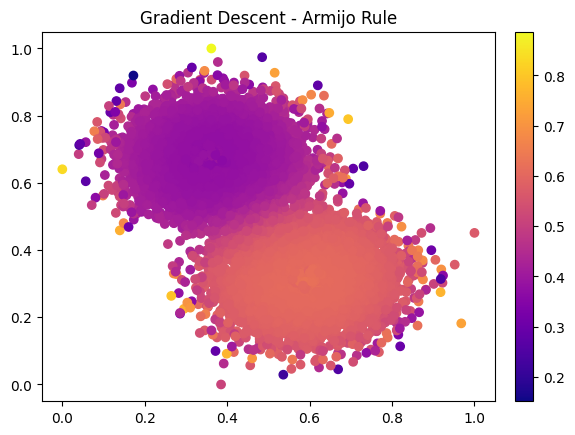

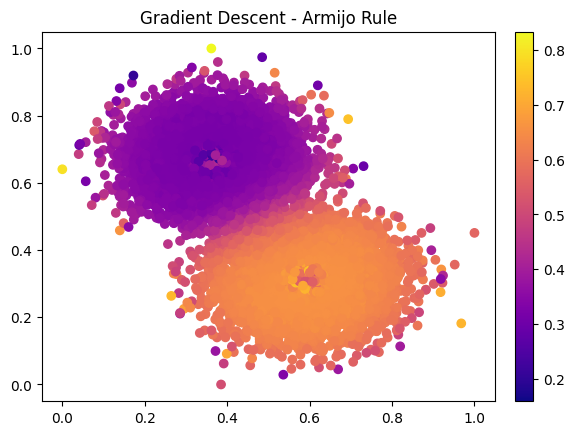

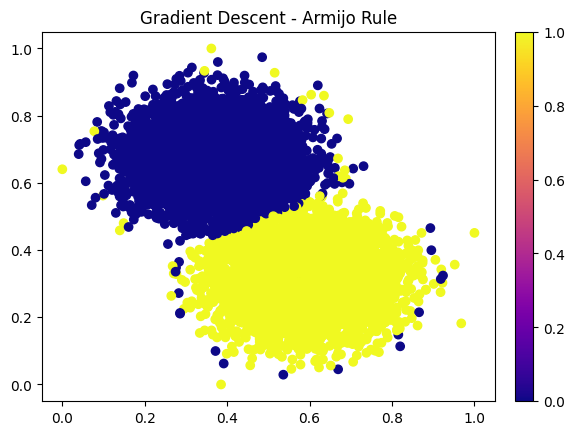

In [28]:
### to save the images and manually produce the gif

y_unlabeled_list.append(y_unlabeled)

for i in range(0,len(y_unlabeled_list),1):
    y_pred = y_unlabeled_list[i]
    im = plt.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap=c_map)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title('Gradient Descent - Armijo Rule')
    plt.show()


_________________________________________________________________________________________________________________

## Fixed step-size

In [29]:
# # Define Gradient Descent with fixed Rule

# def gradient_descent_fixed(y_unlabeled, y_true, alfa, threshold, max_iterations):

#     prev_loss = float('inf')

#     y_fixed = y_unlabeled.copy()

#     #needed lists to plot
#     loss_list = []
#     accuracy_list = [accuracy_score(y_true, y_fixed.round())]
#     y_fixed_list = [y_unlabeled_start.copy()]


#     for iteration in range(max_iterations):

#         gradient = compute_gradients(np.arange(len(y_fixed)),y_fixed)

#         current_loss = loss_function(y_fixed)

#         y_fixed = y_fixed - alfa * gradient


#         #plotting updates
#         y_fixed_list.append(y_fixed)
#         accuracy = accuracy_score(y_true, y_fixed.round())
#         accuracy_list.append(accuracy)


#         print('iter:', iteration, '|   current_loss:', current_loss)


#         if abs(prev_loss - current_loss) < threshold:

#             loss_list.append(current_loss)
#             print('Last iteration:', iteration, '|   final loss:', current_loss)

#             break

#         prev_loss = current_loss

#         loss_list.append(current_loss) #plotting update



#     return y_fixed, loss_list, accuracy_list, y_fixed_list

In [30]:
# Define Gradient Descent with fixed Rule

def gradient_descent_fixed(y_unlabeled, y_true, alfa, threshold, max_iterations):

    #prev_loss = float('inf')

    y_fixed = y_unlabeled.copy()

    #needed lists to plot
    loss_list = []
    accuracy_iter_list_fixed = [(accuracy_score(y_true, y_fixed.round()),0)]
    y_fixed_list = [y_unlabeled_start.copy()]


    for iteration in range(max_iterations):

        gradient = compute_gradients(np.arange(len(y_fixed)),y_fixed)

        current_loss = loss_function(y_fixed)

        y_fixed = y_fixed - alfa * gradient


        #plotting updates
        y_fixed_list.append(y_fixed)
        accuracy = accuracy_score(y_true, y_fixed.round())
        accuracy_iter_list_fixed.append((accuracy, iteration))


        print('iter:', iteration, '|   current_loss:', current_loss)


        if current_loss < threshold:

            loss_list.append(current_loss)


            break

        prev_loss = current_loss

        loss_list.append(current_loss) #plotting update



    return y_fixed, loss_list, accuracy_iter_list_fixed, y_fixed_list

In [31]:
y_unlabeled = y_unlabeled_start.copy()
print(f"Initial value of Loss function: {loss_function(y_unlabeled)}")

Initial value of Loss function: 557492.1157217259


In [32]:
max_iterations = 100
threshold = 0.06*loss_function(y_unlabeled_start)
alfa = 1/L

start = timer()

y_unlabeled, loss_list, accuracy_iter_list_fixed, y_unlabeled_list = gradient_descent_fixed(y_unlabeled, y_true, alfa, threshold, max_iterations)

end = timer()
cpu_time_list.append(('Fixed', (end-start)))


print(f"___ \n")
print(f"Execution time in seconds: {(end - start)}")
print(f"Execution time in minutes: {(end - start)/60}")

iter: 0 |   current_loss: 557492.1157217259
iter: 1 |   current_loss: 104775.0252507925
iter: 2 |   current_loss: 62077.6405771289
iter: 3 |   current_loss: 50224.66375434759
iter: 4 |   current_loss: 44980.761241477645
iter: 5 |   current_loss: 41884.81830865028
iter: 6 |   current_loss: 39687.15779717997
iter: 7 |   current_loss: 37942.30249348038
iter: 8 |   current_loss: 36462.80462959041
iter: 9 |   current_loss: 35159.03576520925
iter: 10 |   current_loss: 33983.35938425702
iter: 11 |   current_loss: 32908.03497922416
___ 

Execution time in seconds: 14.588032391000013
Execution time in minutes: 0.24313387318333354


### Results and plots

In [33]:
# Assign labels 0 and 1
loss_list.append(loss_function(y_unlabeled))
y_unlabeled = y_unlabeled.round()

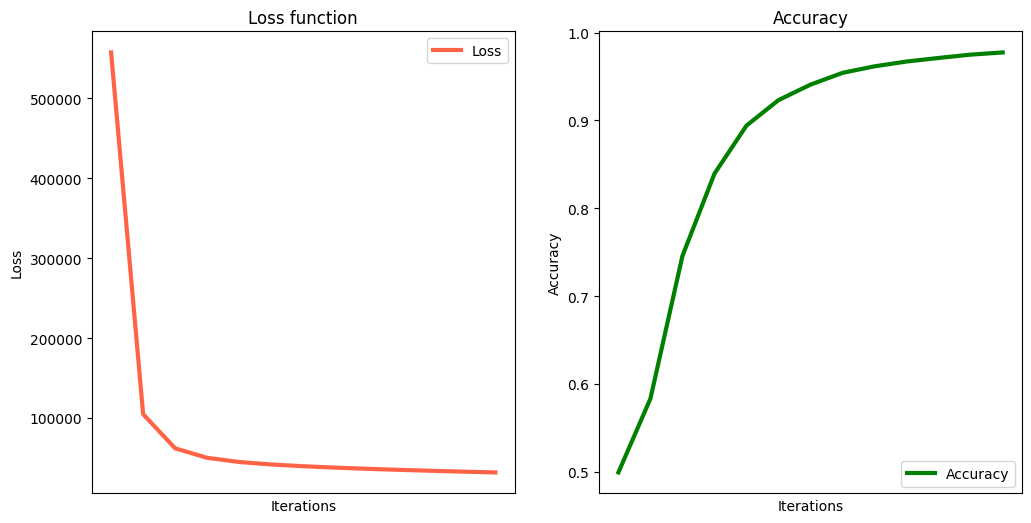

In [34]:
plot_loss_accuracy(loss_list, accuracy_iter_list_fixed, range(len(loss_list)), range(len(accuracy_iter_list_fixed)))

In [35]:
accuracy_iter_list_fixed.append((accuracy_score(y_true, y_unlabeled), accuracy_iter_list_fixed[-1][1]+1))
print(f"Number of misclassified variables: {(np.count_nonzero((y_true - y_unlabeled) != 0))}")
print(f"The accuracy is: {accuracy_score(y_true, y_unlabeled)}")
print(f"The f1 score is: {f1_score(y_true, y_unlabeled)}")

Number of misclassified variables: 220
The accuracy is: 0.977319587628866
The f1 score is: 0.9773709113351161


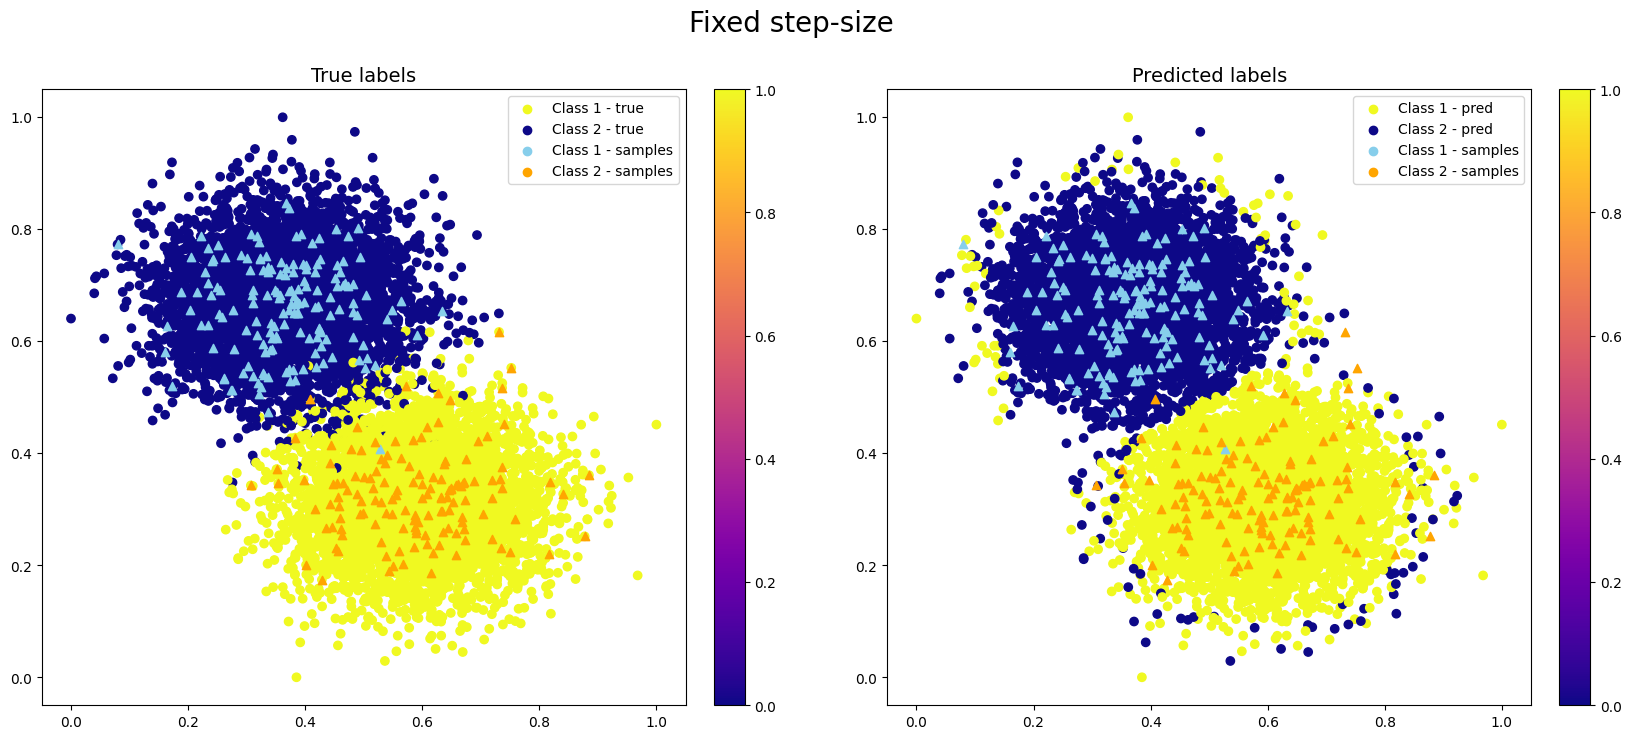

In [36]:
# Plot to visualize the result of classification
mask = np.ones(len(X), dtype=bool)
mask[sample] = False

X_pred = X[mask]
y_pred = y_unlabeled

fig2, (ax1_2,ax2_2) = plt.subplots(1, 2, figsize=(20, 8))

class_1_handle = ax1_2.scatter([], [], c=class_colors[0], label='Class 1 - true')
class_2_handle = ax1_2.scatter([], [], c=class_colors[1], label='Class 2 - true')
pred_class_1_handle = ax1_2.scatter([], [], c=class_colors[0], label='Class 1 - pred')
pred_class_2_handle = ax1_2.scatter([], [], c=class_colors[1], label='Class 2 - pred')
sample_class_1_handle = ax1_2.scatter([], [], c='skyblue', marker='o', label='Class 1 - samples')
sample_class_2_handle = ax1_2.scatter([], [], c='orange', marker='o', label='Class 2 - samples')

### True Labels
im1_2 = ax1_2.scatter(X[:, 0], X[:, 1], c=y, cmap=c_map)
ax1_2.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax1_2.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

# Create a color map legend for the first subplot
cbar1_2 = fig2.colorbar(im1_2, ax=ax1_2, fraction=0.046, pad=0.04)
cbar1_2.set_label('', rotation=270)

ax1_2.legend(handles=[class_1_handle, class_2_handle,sample_class_1_handle, sample_class_2_handle], loc='best')
ax1_2.set_title('True labels', fontsize=14)

### Predicted Labels
im2_2 = ax2_2.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, cmap=c_map)
ax2_2.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax2_2.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

# Create a color map legend for the second subplot
cbar2_2 = fig2.colorbar(im2_2, ax=ax2_2, fraction=0.046, pad=0.04)
cbar2_2.set_label('', rotation=270)

ax2_2.legend(handles=[pred_class_1_handle, pred_class_2_handle, sample_class_1_handle, sample_class_2_handle], loc='best')
ax2_2.set_title('Predicted labels', fontsize=14)

fig2.suptitle('Fixed step-size', fontsize=20)

fig2.show()

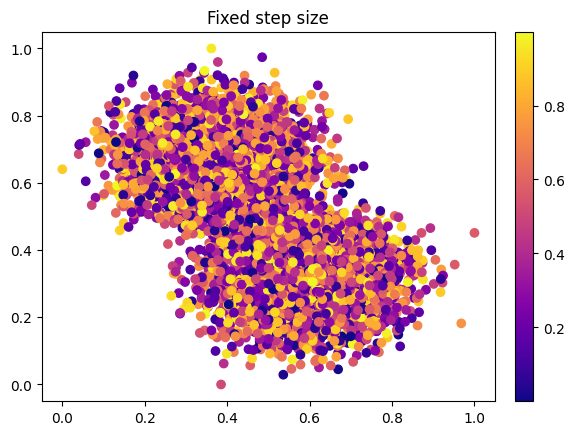

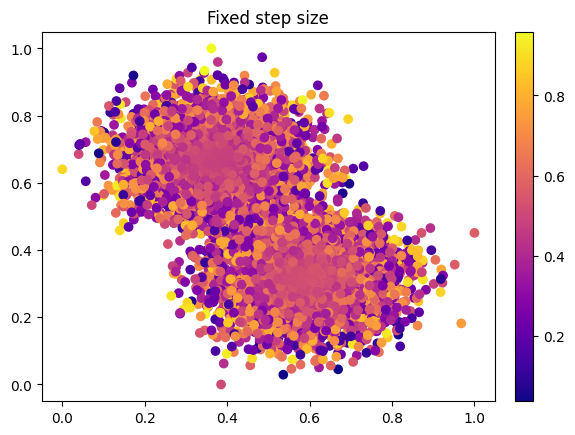

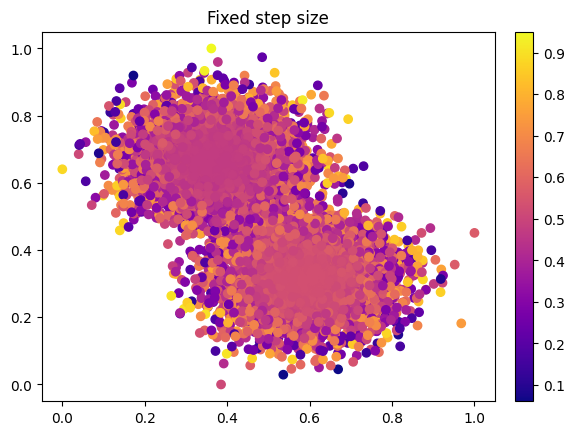

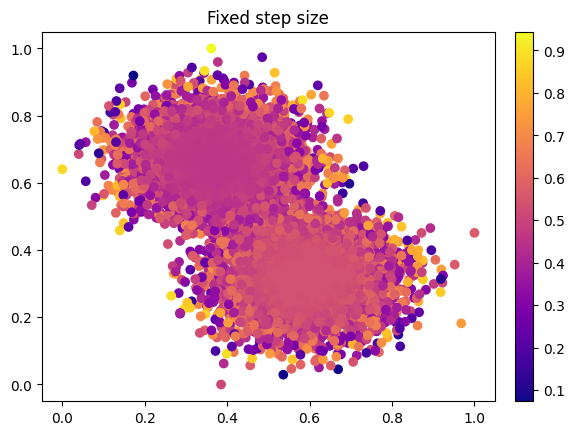

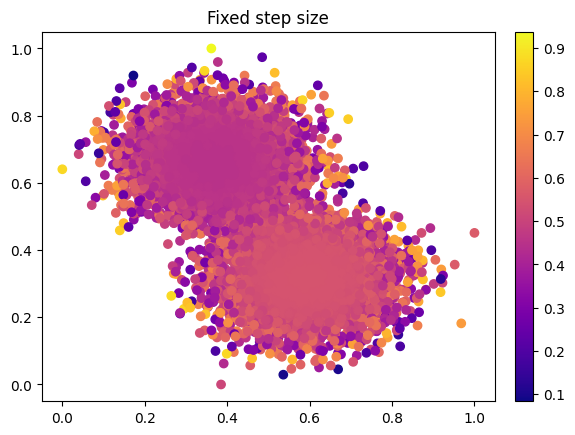

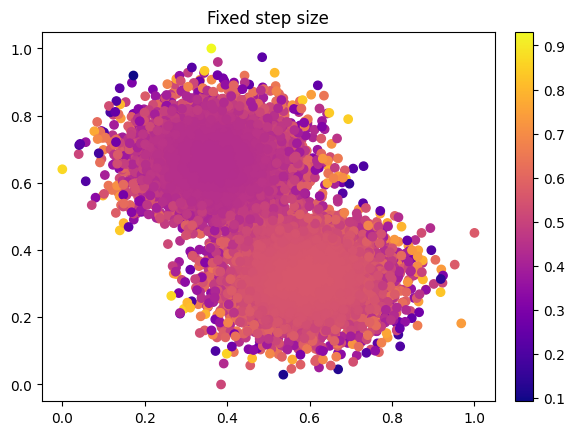

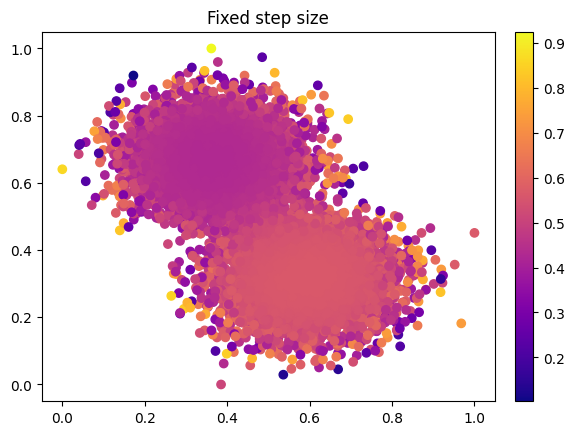

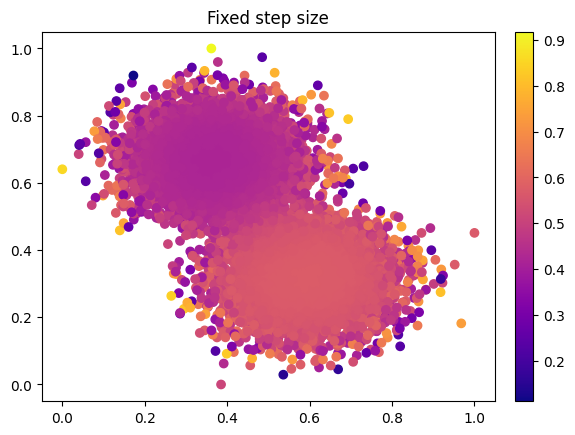

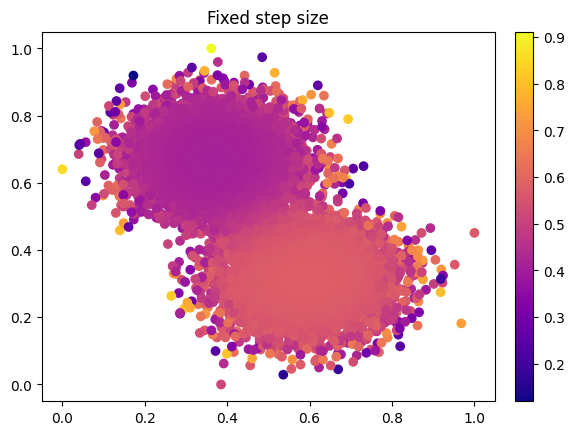

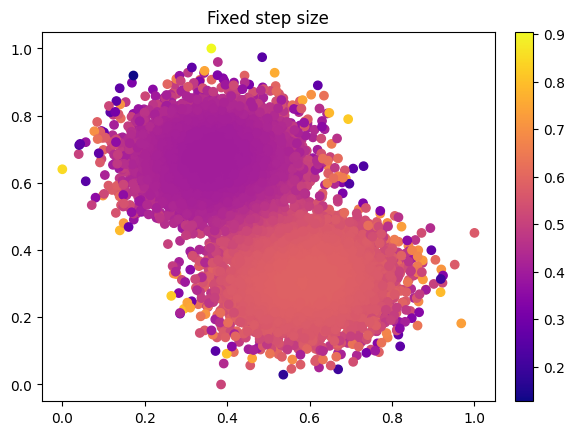

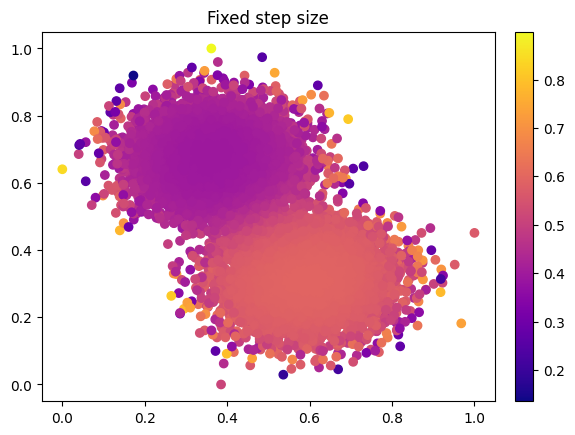

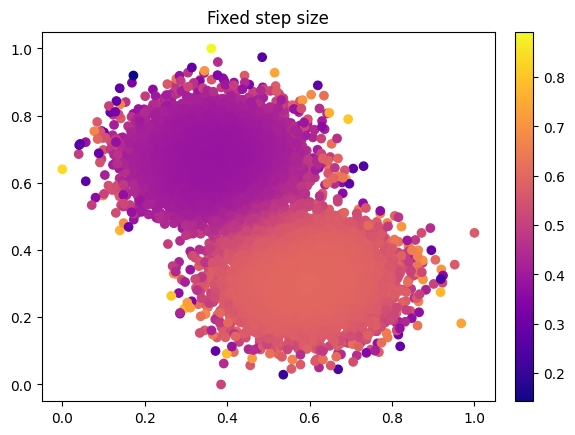

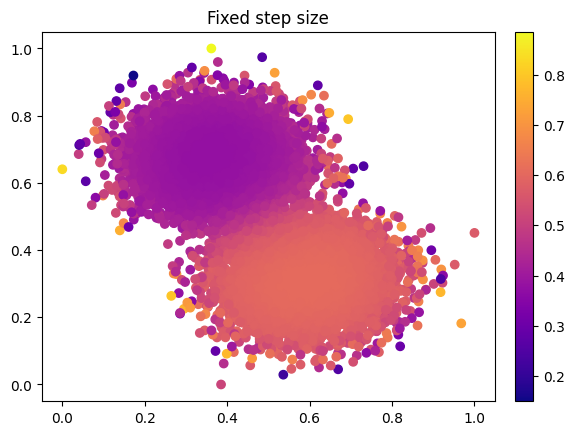

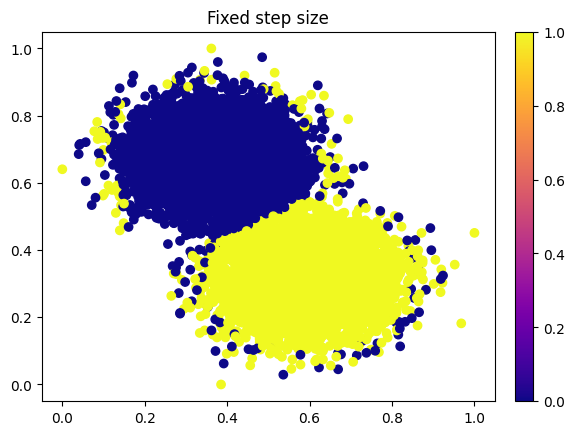

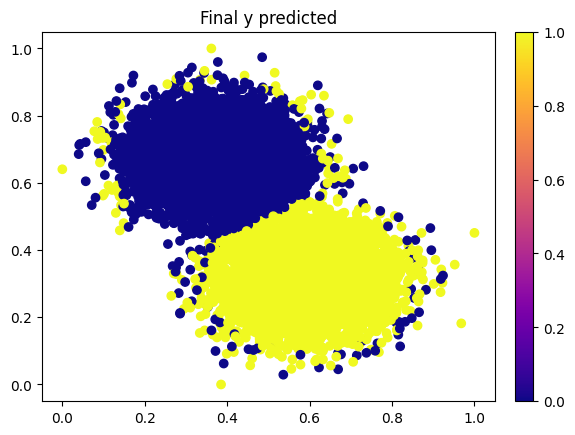

In [38]:
### to save the images and manually produce the gif

for i in range(0,len(y_unlabeled_list),1):
    y_pred = y_unlabeled_list[i]
    im = plt.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap = c_map)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title('Fixed step size')
    plt.show()

y_unlabeled_list.append(y_unlabeled)
im = plt.scatter(X_pred[:, 0], X_pred[:, 1], c = y_unlabeled_list[-1], cmap = c_map)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Final y predicted')
plt.show()


_________________________________________________________________________________________________________________

# BCGD

## BCGD - Random rule

In [39]:
# Defining Random BCGD algorithm

def R_BCGD(y_unlabeled, max_iterations, threshold, alfa):

    previous_y_unlabeled = y_unlabeled.copy()


    # Tolerance (for stopping condition)
    tolerance = (3/100)*len(y_unlabeled)
    c = 0 # tollerance (of change) counter


    # Lists needed for plotting
    loss_list = [loss_function(y_unlabeled)]
    accuracy_iter_list_ran = [(accuracy_score(y_true, y_unlabeled.round()), 0)]
    change_list = []
    y_unlabeled_list = [previous_y_unlabeled]
    iter_list = [0]


    stop = False
    iterations = 0

    while not stop:

        iterations += 1

        j = np.random.randint(len(y_unlabeled)) # random index generator

        gradient_j = compute_gradients(j, y_unlabeled) # compute gradient only for that entry

        y_unlabeled[j] -= alfa * gradient_j     # update  the value

        change = np.abs(y_unlabeled[j] - previous_y_unlabeled[j])

        previous_y_unlabeled[j] = y_unlabeled[j] # needed to compute the change

        change_list.append(change) #needed for plotting


        # Print, and saving for plotting, the results

        if iterations%10000 == 0:

            iter_list.append(iterations)

            accuracy_iter_list_ran.append((accuracy_score(y_true, y_unlabeled.round()), iterations))

            y_unlabeled_list.append(y_unlabeled)


        if iterations%20000 == 0:

            loss_list.append(loss_function(y_unlabeled))


        # Stopping conditions

        if change < threshold or iterations >= max_iterations:

            c += 1
            if c%10 == 0:
                print(f'Tolerance counter: {c} | iteration: ', iterations, '|', 'change:', change)

            if c >= tolerance:

                print(f'\n\n\nLast iteration: ', iterations, '|', 'change:', change)

                iter_list.append(iterations)

                stop = True

    return y_unlabeled, loss_list, accuracy_iter_list_ran, change_list, y_unlabeled_list, iter_list

In [40]:
y_unlabeled = y_unlabeled_start.copy()
print(f"Initial value of Loss function: {loss_function(y_unlabeled)}")

Initial value of Loss function: 557492.1157217259


In [41]:
max_iterations = 1000000
threshold = 1e-4*0.5
learning_rate = 1/L


start = timer()

y_unlabeled, loss_list, accuracy_iter_list_ran, change_list, y_unlabeled_list, iter_list = R_BCGD(y_unlabeled, max_iterations, threshold, learning_rate)

end = timer()
cpu_time_list.append(('Random', (end-start)))


print(f"\n Execution time in seconds: {(end - start)}")
print(f"Execution time in minutes: {(end - start)/60}")

Tolerance counter: 10 | iteration:  5177 | change: 1.0403625522070747e-05
Tolerance counter: 20 | iteration:  9171 | change: 4.0358022144748595e-05
Tolerance counter: 30 | iteration:  14395 | change: 1.4719799743878603e-05
Tolerance counter: 40 | iteration:  17245 | change: 3.6683112026147935e-05
Tolerance counter: 50 | iteration:  22272 | change: 2.8296149710227425e-05
Tolerance counter: 60 | iteration:  28409 | change: 4.1197132199133346e-05
Tolerance counter: 70 | iteration:  34352 | change: 2.0047995615501968e-05
Tolerance counter: 80 | iteration:  39643 | change: 4.3139714717255195e-05
Tolerance counter: 90 | iteration:  44401 | change: 4.156488811579706e-06
Tolerance counter: 100 | iteration:  50012 | change: 3.305682982568392e-06
Tolerance counter: 110 | iteration:  59508 | change: 1.4599838271900367e-05
Tolerance counter: 120 | iteration:  71698 | change: 6.7064361203850176e-06
Tolerance counter: 130 | iteration:  82055 | change: 2.435403800349345e-05
Tolerance counter: 140 | i

### Results and plots

In [42]:
# Assign labels
y_unlabeled = y_unlabeled.round()

In [43]:
print(f"Number of misclassified variables: {(np.count_nonzero((y_true - y_unlabeled) != 0))}")
print(f"The accuracy is: {accuracy_score(y_true, y_unlabeled)}")
print(f"The f1 score is: {f1_score(y_true, y_unlabeled)}")

Number of misclassified variables: 109
The accuracy is: 0.9887628865979381
The f1 score is: 0.9888009863351483


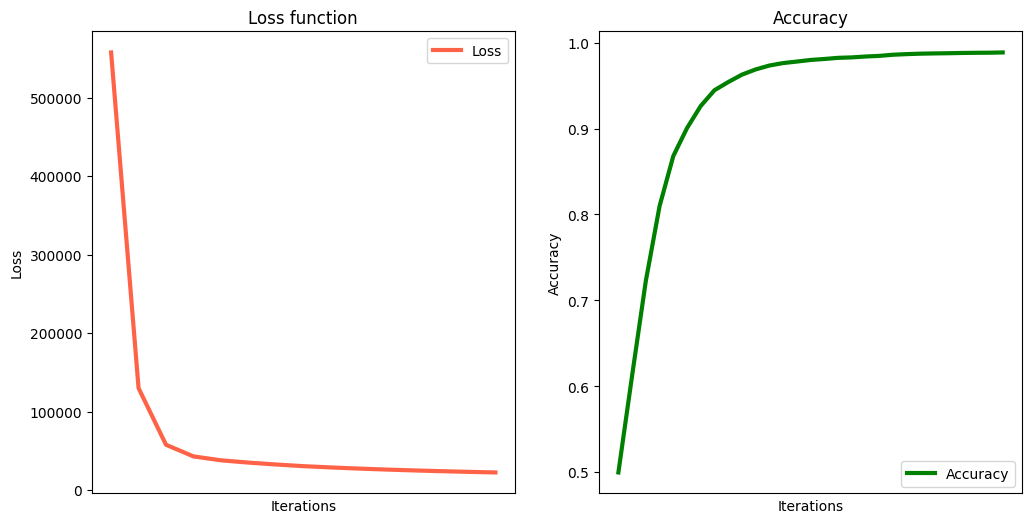

In [44]:
plot_loss_accuracy(loss_list,accuracy_iter_list_ran,range(len(loss_list)),range(len(accuracy_iter_list_ran)))

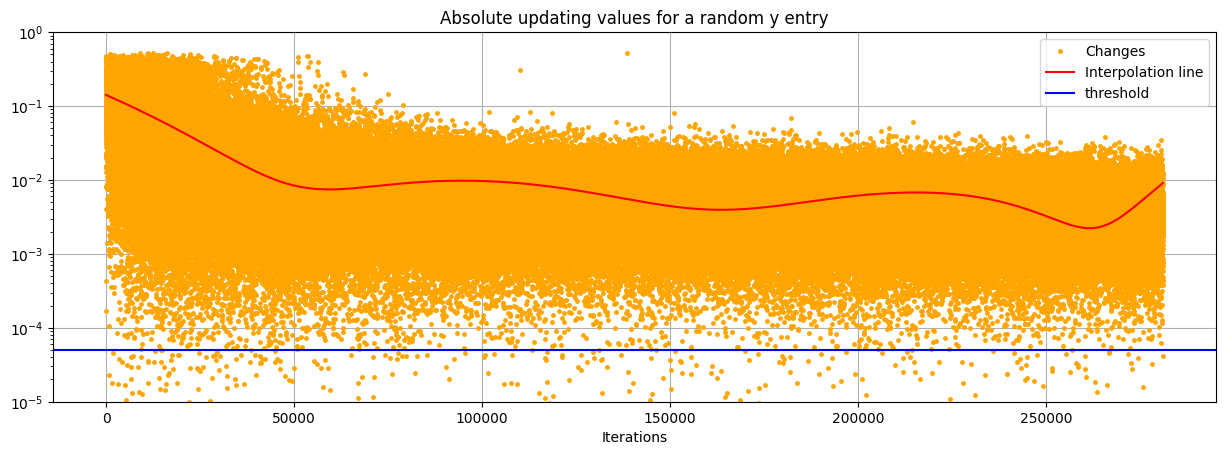

In [45]:
plot_change(change_list, range(len(change_list)), threshold)

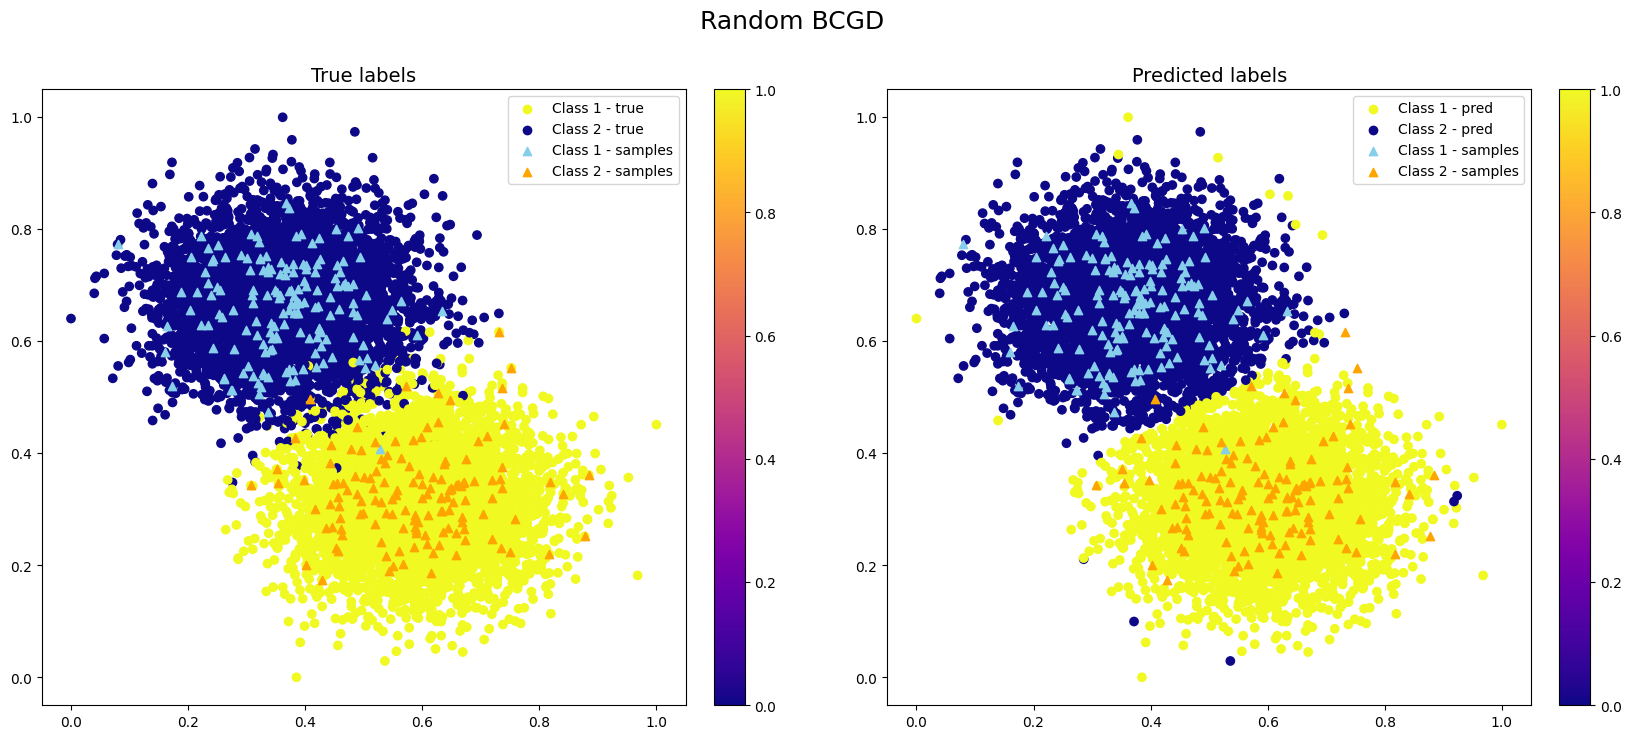

In [46]:
# Plot to visualize the result of classification

mask = np.ones(len(X), dtype=bool)
mask[sample] = False

X_pred = X[mask]
y_pred = y_unlabeled

fig3, (ax1_3,ax2_3) = plt.subplots(1, 2, figsize=(20, 8))


class_1_handle = plt.scatter([], [], c=class_colors[0], label='Class 1 - true')
class_2_handle = plt.scatter([], [], c=class_colors[1], label='Class 2 - true')
pred_class_1_handle = plt.scatter([], [], c=class_colors[0], label='Class 1 - pred')
pred_class_2_handle = plt.scatter([], [], c=class_colors[1], label='Class 2 - pred')
sample_class_1_handle = plt.scatter([], [], c='skyblue', marker='^', label='Class 1 - samples')
sample_class_2_handle = plt.scatter([], [], c='orange', marker='^', label='Class 2 - samples')


### True Labels
im1_3 = ax1_3.scatter(X[:, 0], X[:, 1], c = y, cmap=c_map)
ax1_3.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax1_3.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

cbar1_3 = fig3.colorbar(im1_3, ax=ax1_3, fraction=0.046, pad=0.04)
cbar1_3.set_label('', rotation=270)

ax1_3.legend(handles=[class_1_handle, class_2_handle,sample_class_1_handle, sample_class_2_handle], loc='best')
ax1_3.set_title('True labels', fontsize=14)


### Predicted Labels
im2_3 = ax2_3.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap=c_map)
ax2_3.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax2_3.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')


cbar2_3 = fig3.colorbar(im2_3, ax=ax2_3, fraction=0.046, pad=0.04)
cbar2_3.set_label('',rotation=270)

ax2_3.legend(handles=[pred_class_1_handle, pred_class_2_handle, sample_class_1_handle, sample_class_2_handle], loc='best')
ax2_3.set_title('Predicted labels', fontsize=14)


fig3.suptitle('Random BCGD', fontsize=18)

fig3.show()

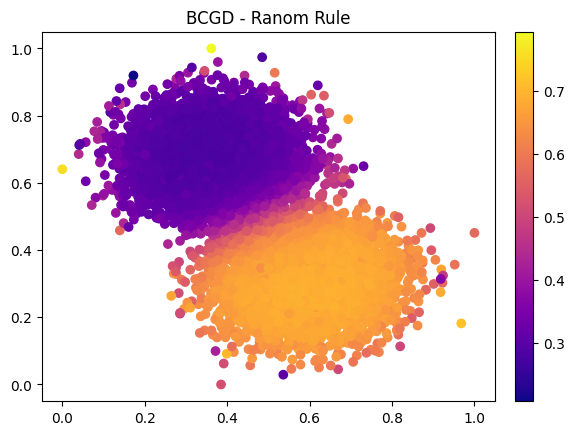

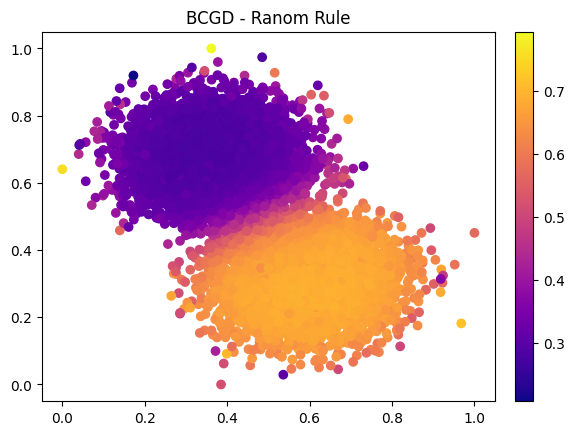

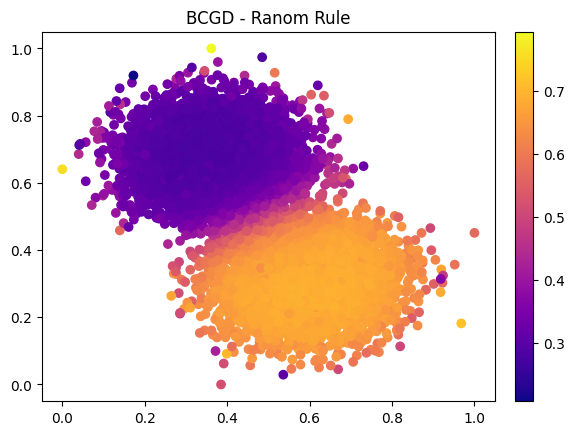

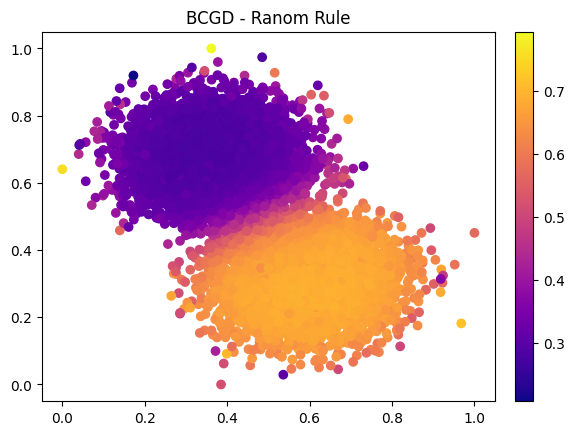

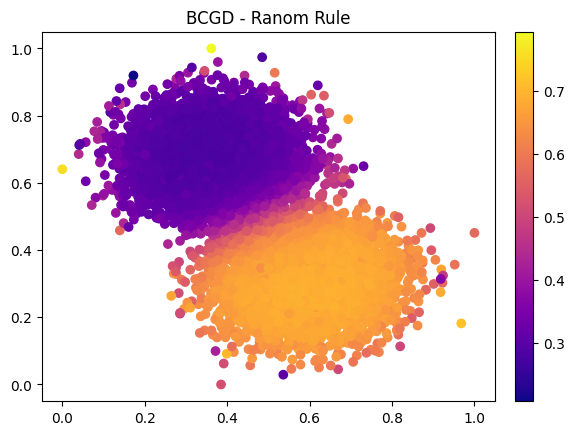

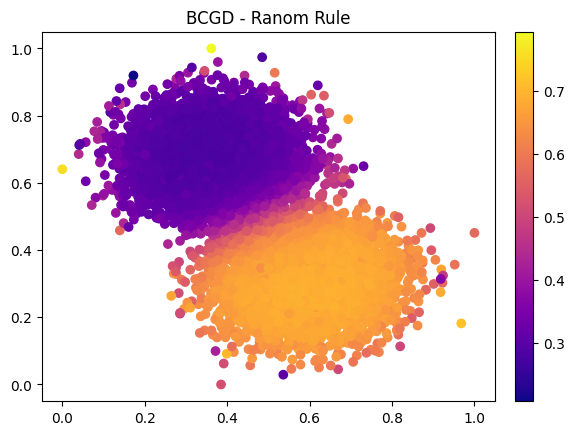

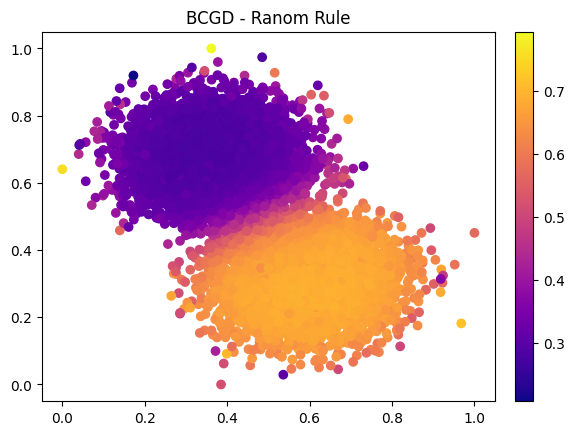

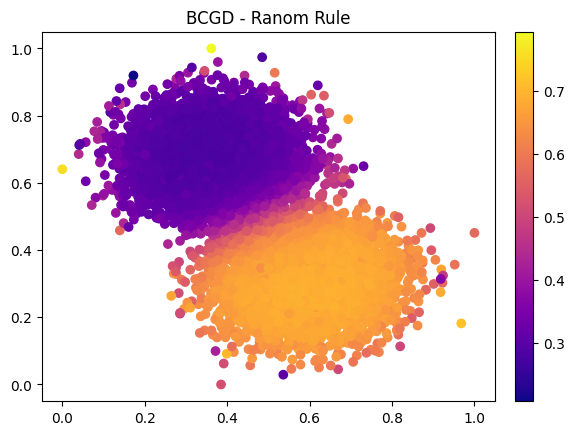

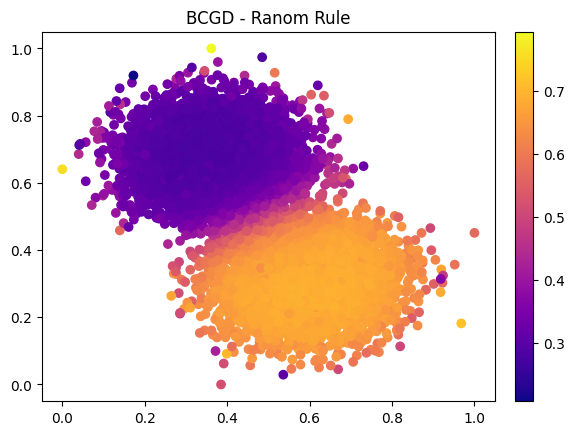

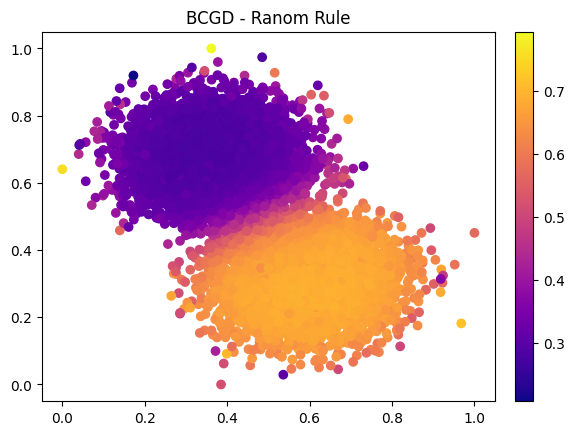

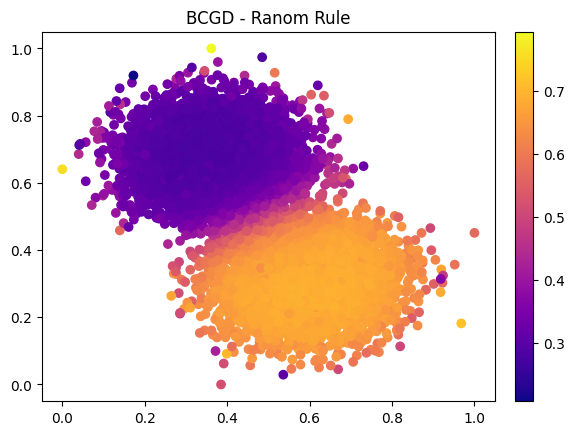

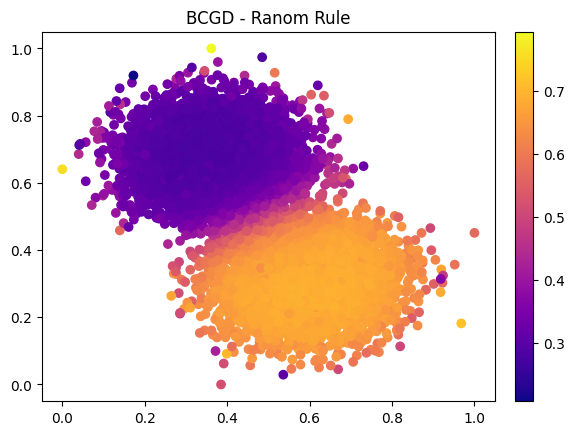

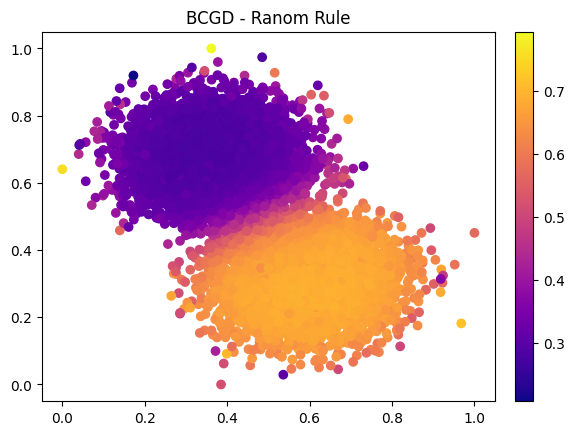

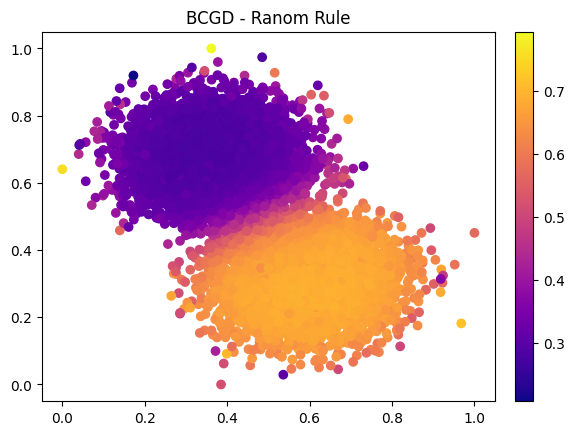

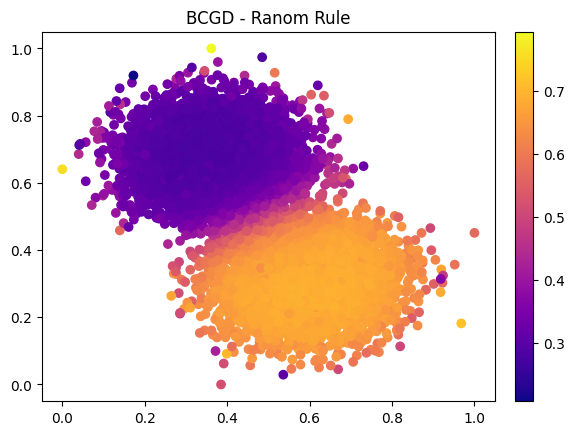

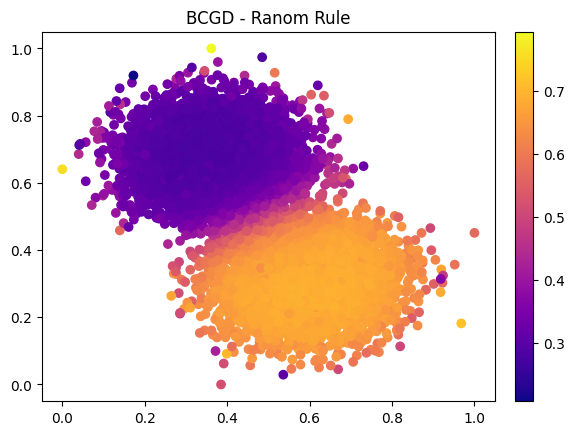

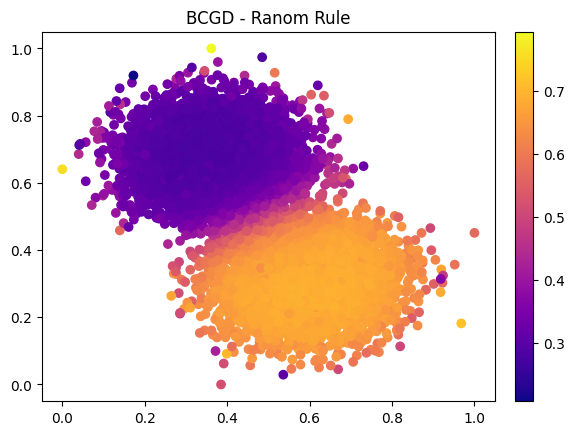

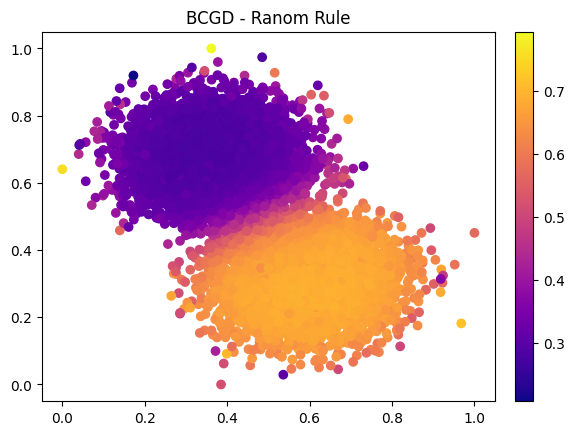

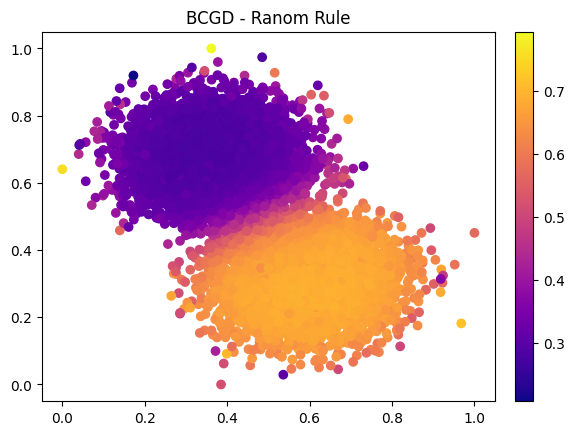

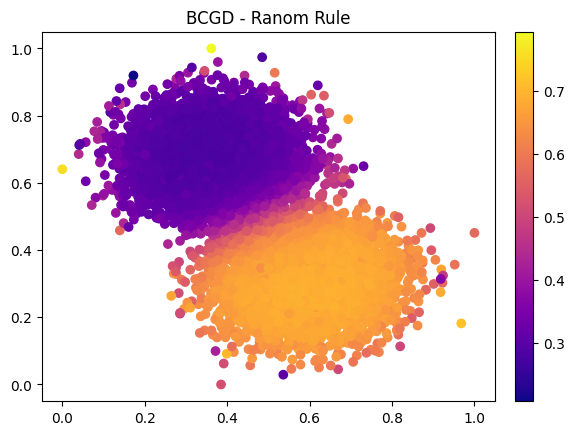

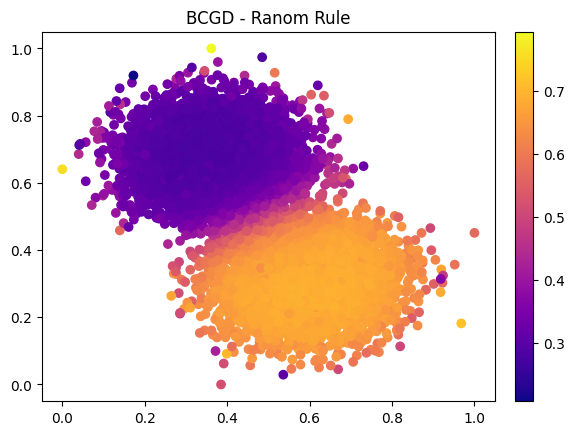

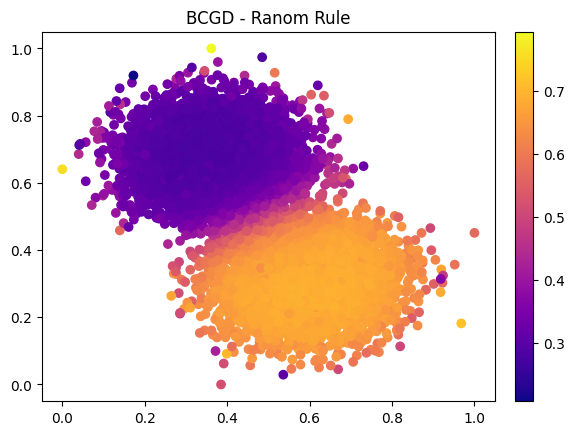

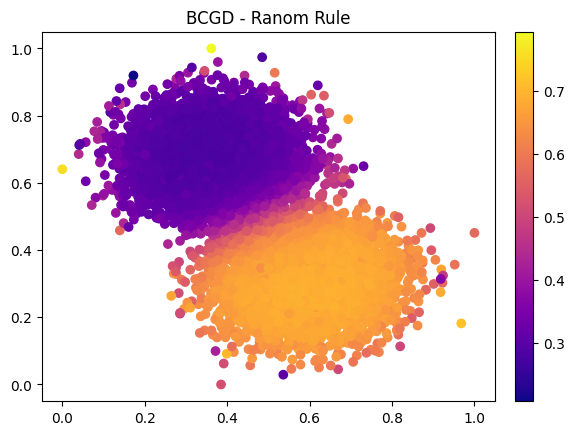

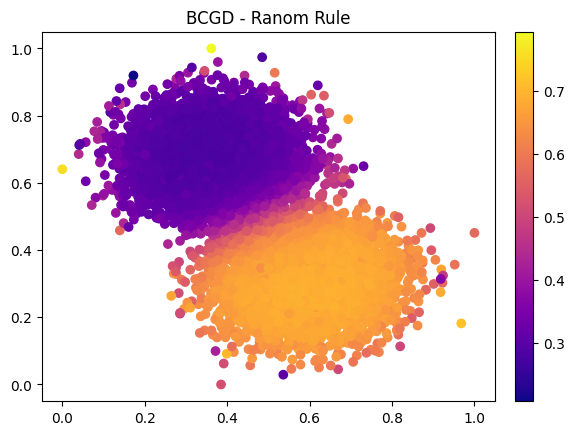

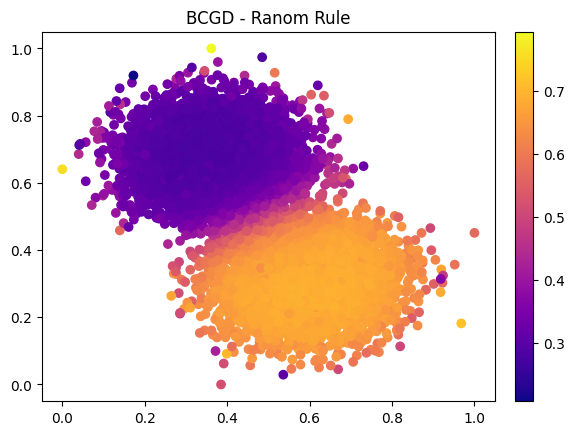

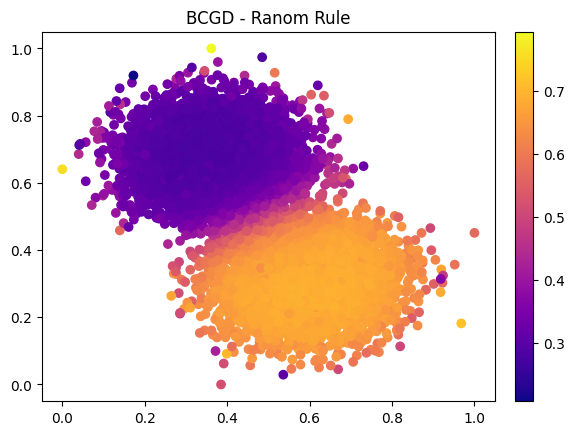

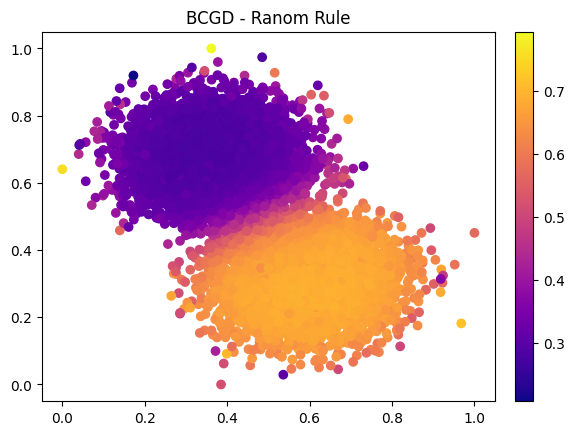

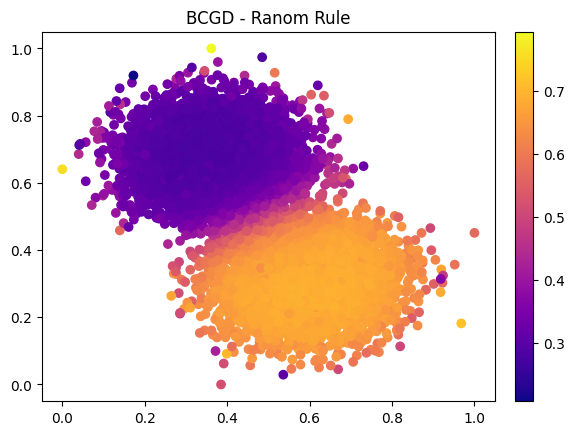

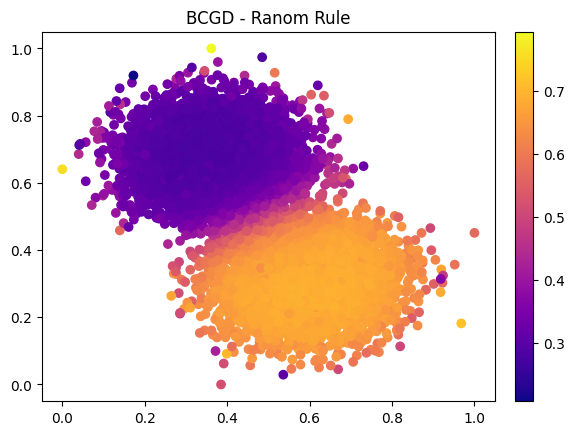

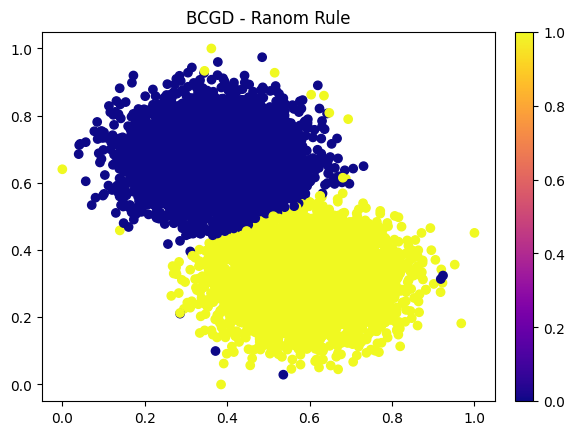

In [47]:
### to save the images and manually produce the gif

y_unlabeled_list.append(y_unlabeled)

for i in range(0,len(y_unlabeled_list),1):
    y_pred = y_unlabeled_list[i]
    im = plt.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap=c_map)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    #plt.set_facecolor(background)
    plt.title('BCGD - Ranom Rule')
    plt.show()

## BCGD - Gauss-Southwell rule

In [48]:
# Heapify needed for computing the max of the gradient
import heapq


def BCGD_GS(y_unlabeled, alfa, treshold, max_iterations):

    previous_y_unlabeled = y_unlabeled.copy()

    #compute the whole gradient only once for all
    gradients = compute_gradients(np.arange(len(y_unlabeled)), y_unlabeled)

    # Squared norm of the gradient, calculate only once for all
    stop_condition = np.dot(gradients, gradients) #stop condition will be sqrt of this object (look the exit condition of the while)

    #Creating a list so to use heapify properties
    sorted_list = [(-np.abs(v),k) for k,v in zip(np.arange(len(gradients)), gradients)]
    heapq.heapify(sorted_list)

    #setting a threshold relative to the gradient
    initial_grad_norm = np.sqrt(stop_condition)
    treshold *= initial_grad_norm


    # Lists needed for plotting
    change_list = [initial_grad_norm]
    accuracy_iter_list_gs = [(accuracy_score(y_true, y_unlabeled.round()),0)]
    iter_list = [0]
    loss_list = [loss_function(y_unlabeled)]

    stop = False
    iterations = 0

    while not stop:

        iterations += 1

        j_max = heapq.heappop(sorted_list)[1] #take the index corrisponding to the max of the heap

        y_unlabeled[j_max] -= alfa * gradients[j_max] #update  the value

        new_grad = compute_gradients(j_max, y_unlabeled) #compute gradient only for that entry

        stop_condition = stop_condition - (gradients[j_max] ** 2) + (new_grad ** 2) #update stop condition

        gradients[j_max] = new_grad #update gradient

        heapq.heappush(sorted_list, (- np.abs(new_grad), j_max)) #update heap (thus recalculate the max)


        # Exit condition
        grad_norm = np.sqrt(stop_condition)
        change_list.append(grad_norm) #needed for plottin


        if iterations%100 == 0:
            iter_list.append(iterations)
            accuracy_iter_list_gs.append((accuracy_score(y_true, y_unlabeled.round()), iterations))
            y_unlabeled_list.append(y_unlabeled)

        if iterations%15000 == 0:
            loss_list.append(loss_function(y_unlabeled))

            print('iteration:', iterations, '|', 'gradient norm:', grad_norm)



        # Stopping conditions

        if grad_norm < treshold or iterations >= max_iterations:

            print('\n\n', 'convergence reached')

            print('iteration:', iterations, '|', 'gradient norm:', grad_norm)


            stop = True


    return y_unlabeled, loss_list, accuracy_iter_list_gs, change_list, y_unlabeled_list, iter_list


In [49]:
y_unlabeled = y_unlabeled_start.copy()
print(f"Initial value of Loss function: {loss_function(y_unlabeled)}")

Initial value of Loss function: 557492.1157217259


In [50]:
start = timer()


alfa = 1/L
treshold = 1e-2
max_iterations = 1000000

y_unlabeled, loss_list, accuracy_iter_list_gs, change_list, y_unlabeled_list, iter_list = BCGD_GS(y_unlabeled, alfa, treshold, max_iterations)

end = timer()
cpu_time_list.append(("GS", (end-start)))



print(f"\n Execution time in seconds: {(end - start)}")
print(f"Execution time in minutes: {(end - start)/60}")

iteration: 15000 | gradient norm: 4811.615668024306
iteration: 30000 | gradient norm: 1816.3303737131178
iteration: 45000 | gradient norm: 899.2334284398722
iteration: 60000 | gradient norm: 500.67566212093084


 convergence reached
iteration: 68337 | gradient norm: 386.073308777389

 Execution time in seconds: 10.688604461000068
Execution time in minutes: 0.17814340768333448


### Results and plots

In [51]:
# Assign labels
y_unlabeled = y_unlabeled.round()

In [52]:
accuracy_iter_list_gs.append((accuracy_score(y_true, y_unlabeled), iter_list[-1]))

print(f"Number of misclassified variables: {(np.count_nonzero((y_true - y_unlabeled) != 0))}")
print(f"The accuracy is: {accuracy_score(y_true, y_unlabeled)}")
print(f"The f1 score is: {f1_score(y_true, y_unlabeled)}")

Number of misclassified variables: 126
The accuracy is: 0.9870103092783505
The f1 score is: 0.9870423693953105


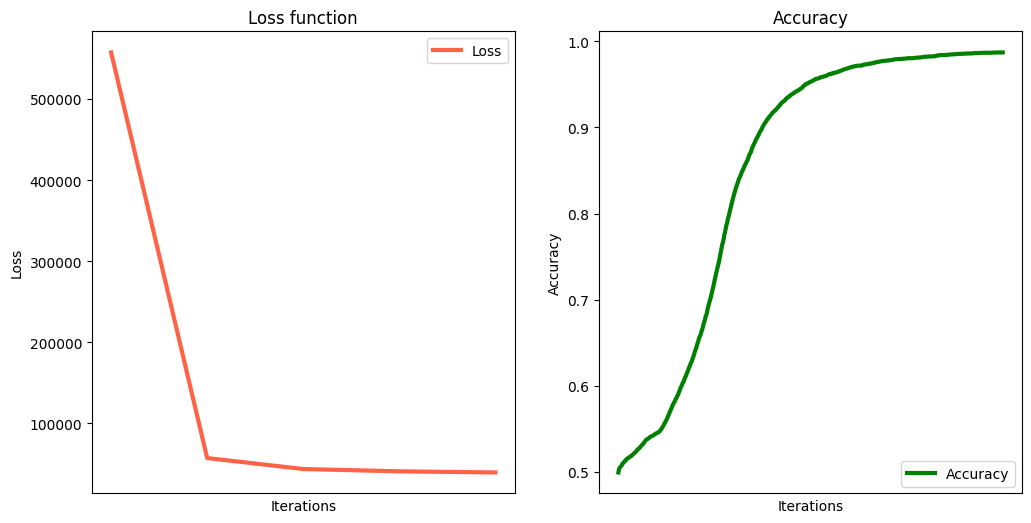

In [53]:
plot_loss_accuracy(loss_list,accuracy_iter_list_gs, range(len(loss_list)),range(len(accuracy_iter_list_gs)))

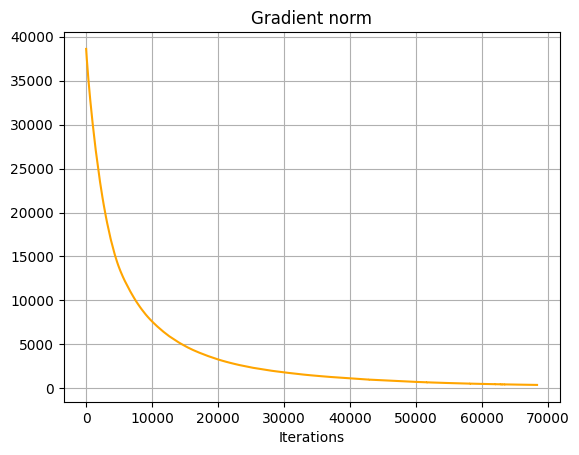

In [54]:
plot_gradnorm(change_list, range(len(change_list)))

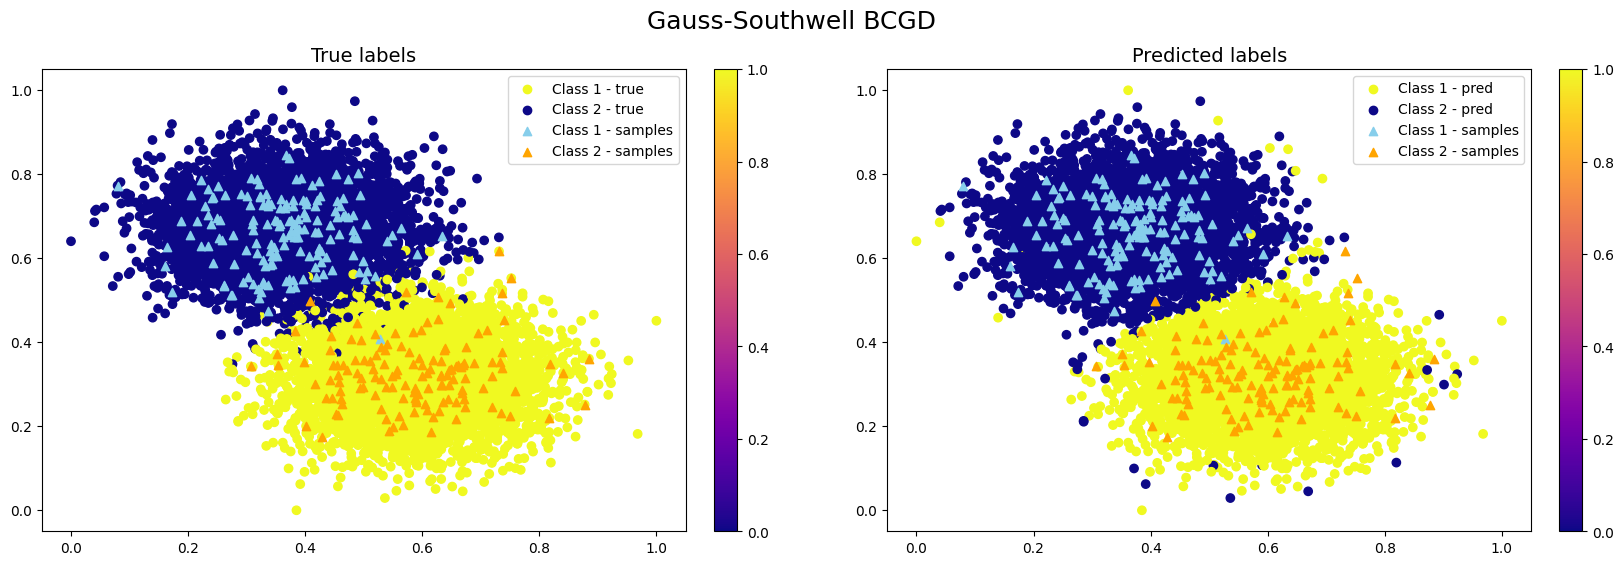

In [55]:
# Plot to visualize the result of classification

mask = np.ones(len(X), dtype=bool)
mask[sample] = False

X_pred = X[mask]
y_pred = y_unlabeled

fig4, (ax1_4,ax2_4) = plt.subplots(1, 2, figsize=(20, 6))


class_1_handle = plt.scatter([], [], c=class_colors[0], label='Class 1 - true')
class_2_handle = plt.scatter([], [], c=class_colors[1], label='Class 2 - true')
pred_class_1_handle = plt.scatter([], [], c=class_colors[0], label='Class 1 - pred')
pred_class_2_handle = plt.scatter([], [], c=class_colors[1], label='Class 2 - pred')
sample_class_1_handle = plt.scatter([], [], c='skyblue', marker='^', label='Class 1 - samples')
sample_class_2_handle = plt.scatter([], [], c='orange', marker='^', label='Class 2 - samples')


### True Labels
img1_4 = ax1_4.scatter(X[:, 0], X[:, 1], c = y, cmap= c_map)
ax1_4.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax1_4.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

cbar1_4 = fig4.colorbar(img1_4, ax=ax1_4, fraction=0.046, pad=0.04)
cbar1_4.set_label('', rotation=270)

ax1_4.legend(handles=[class_1_handle, class_2_handle,sample_class_1_handle, sample_class_2_handle], loc='best')
ax1_4.set_title('True labels', fontsize=14)


### Predicted Labels
img2_4 = ax2_4.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap =c_map)
ax2_4.scatter(X[sample][y[sample] == 0][:, 0], X[sample][y[sample] == 0][:, 1], c='skyblue', marker='^')
ax2_4.scatter(X[sample][y[sample] == 1][:, 0], X[sample][y[sample] == 1][:, 1], c='orange', marker='^')

cbar2_4 = fig3.colorbar(img2_4, ax=ax2_4, fraction=0.046, pad=0.04)
cbar2_4.set_label('', rotation=270)

ax2_4.legend(handles=[pred_class_1_handle, pred_class_2_handle, sample_class_1_handle, sample_class_2_handle], loc='best')
ax2_4.set_title('Predicted labels', fontsize=14)


fig4.suptitle('Gauss-Southwell BCGD', fontsize=18)

fig4.show()

In [ ]:
### to save the images and manually produce the gif

y_unlabeled_list.append(y_unlabeled)

for i in range(0,len(y_unlabeled_list),4):
    y_pred = y_unlabeled_list[i]
    im = plt.scatter(X_pred[:, 0], X_pred[:, 1], c = y_pred, cmap=c_map)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    #plt.set_facecolor(background)
    plt.title('BCGD - Gauss-Southwell')
    plt.show()

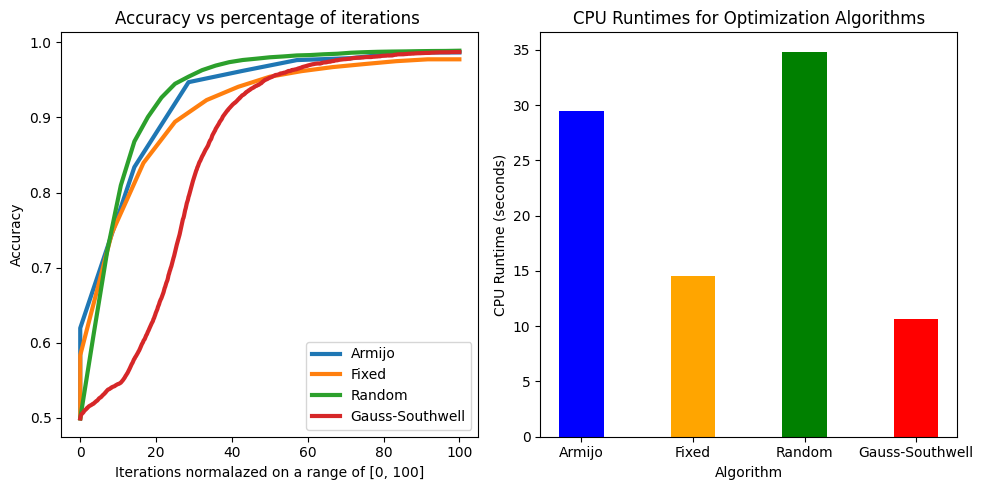

In [57]:

import numpy as np
import matplotlib.pyplot as plt



# Extract the iterations and accuracies separately for each list
accs_armijo, iters_armijo = zip(*accuracy_iter_list_armijo)
accs_fixed, iters_fixed = zip(*accuracy_iter_list_fixed)
accs_ran, iters_ran = zip(*accuracy_iter_list_ran)
accs_gs, iters_gs = zip(*accuracy_iter_list_gs)

# Scale the iterations using mean max scaling
iters_armijo_scaled = (np.array(iters_armijo) - np.min(iters_armijo)) / (np.max(iters_armijo) - np.min(iters_armijo)) * 100
iters_fixed_scaled = (np.array(iters_fixed) - np.min(iters_fixed)) / (np.max(iters_fixed) - np.min(iters_fixed)) * 100
iters_ran_scaled = (np.array(iters_ran) - np.min(iters_ran)) / (np.max(iters_ran) - np.min(iters_ran)) * 100
iters_gs_scaled = (np.array(iters_gs) - np.min(iters_gs)) / (np.max(iters_gs) - np.min(iters_gs)) * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the accuracies against the scaled iterations in the left subplot
ax1.plot(iters_armijo_scaled, accs_armijo, label='Armijo', linewidth=3)
ax1.plot(iters_fixed_scaled, accs_fixed, label='Fixed', linewidth=3)
ax1.plot(iters_ran_scaled, accs_ran, label='Random', linewidth=3)
ax1.plot(iters_gs_scaled, accs_gs, label='Gauss-Southwell', linewidth=3)

# Add axis labels and a legend to the left subplot
ax1.set_xlabel('Iterations normalazed on a range of [0, 100]')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs percentage of iterations ')
ax1.legend()

cpu_runtimes = np.array([x[1] for x in cpu_time_list[-4:]])

algorithms = ['Armijo', 'Fixed', 'Random', 'Gauss-Southwell']
ax2.bar(algorithms, cpu_runtimes, color=['blue', 'orange', 'green', 'red'], width=0.4)

# Add axis labels and a title
ax2.set_xlabel('Algorithm')
ax2.set_ylabel('CPU Runtime (seconds)')
ax2.set_title('CPU Runtimes for Optimization Algorithms')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()


In [58]:
accuracy_iter_list_armijo

[(0.49948453608247423, 0),
 (0.6195876288659794, 0),
 (0.8339175257731959, 1),
 (0.9469072164948453, 2),
 (0.961958762886598, 3),
 (0.9762886597938144, 4),
 (0.9788659793814433, 5),
 (0.9864948453608248, 6),
 (0.9864948453608248, 7)]

In [59]:
accuracy_iter_list_fixed

[(0.49948453608247423, 0),
 (0.5834020618556701, 0),
 (0.7457731958762887, 1),
 (0.839381443298969, 2),
 (0.8941237113402062, 3),
 (0.9230927835051547, 4),
 (0.9407216494845361, 5),
 (0.9541237113402062, 6),
 (0.9615463917525773, 7),
 (0.9670103092783505, 8),
 (0.9710309278350515, 9),
 (0.9748453608247423, 10),
 (0.977319587628866, 11),
 (0.977319587628866, 12)]

In [60]:
accuracy_iter_list_ran

[(0.49948453608247423, 0),
 (0.6123711340206186, 10000),
 (0.722680412371134, 20000),
 (0.8096907216494845, 30000),
 (0.8680412371134021, 40000),
 (0.900618556701031, 50000),
 (0.9263917525773195, 60000),
 (0.9447422680412371, 70000),
 (0.9542268041237113, 80000),
 (0.9628865979381444, 90000),
 (0.9689690721649484, 100000),
 (0.9735051546391753, 110000),
 (0.9763917525773196, 120000),
 (0.9781443298969072, 130000),
 (0.98, 140000),
 (0.9811340206185567, 150000),
 (0.9824742268041237, 160000),
 (0.9829896907216494, 170000),
 (0.984020618556701, 180000),
 (0.9847422680412371, 190000),
 (0.9860824742268042, 200000),
 (0.9868041237113402, 210000),
 (0.987319587628866, 220000),
 (0.9876288659793815, 230000),
 (0.9878350515463917, 240000),
 (0.9881443298969073, 250000),
 (0.9883505154639175, 260000),
 (0.9884536082474227, 270000),
 (0.9887628865979381, 280000)]

In [61]:
accuracy_iter_list_gs

[(0.49948453608247423, 0),
 (0.5029896907216495, 100),
 (0.5045360824742268, 200),
 (0.5054639175257732, 300),
 (0.5062886597938144, 400),
 (0.5069072164948454, 500),
 (0.5078350515463917, 600),
 (0.5092783505154639, 700),
 (0.51, 800),
 (0.5109278350515464, 900),
 (0.5114432989690721, 1000),
 (0.5119587628865979, 1100),
 (0.5131958762886598, 1200),
 (0.5135051546391752, 1300),
 (0.5143298969072165, 1400),
 (0.5150515463917525, 1500),
 (0.5156701030927835, 1600),
 (0.5160824742268041, 1700),
 (0.5164948453608248, 1800),
 (0.5168041237113402, 1900),
 (0.517319587628866, 2000),
 (0.5177319587628866, 2100),
 (0.5184536082474227, 2200),
 (0.5187628865979381, 2300),
 (0.5189690721649485, 2400),
 (0.5197938144329897, 2500),
 (0.5205154639175258, 2600),
 (0.5210309278350516, 2700),
 (0.5218556701030928, 2800),
 (0.5224742268041237, 2900),
 (0.5227835051546392, 3000),
 (0.5234020618556701, 3100),
 (0.5243298969072165, 3200),
 (0.5250515463917526, 3300),
 (0.5260824742268041, 3400),
 (0.5265979

In [62]:
cpu_time_list[-4:]

[('Armijo', 29.434123908999993),
 ('Fixed', 14.588032391000013),
 ('Random', 34.853832963999935),
 ('GS', 10.688604461000068)]